In [1]:
%run data_acquisition.ipynb

# Análisis Exploratorio de Datos (EDA)

**Antes de iniciar a analizar las hipotesis se parocede a analizar de manera rapida los datos, por un lado se hace un "describe" y por otro se realiza una serie de histogramas para cada una de las columnas con el objetivo de ver si se puede apreciar algun patrón interesante a ser analizado. Como el objetivo de este analisis es predecir el "Attrition_Flag" se realizo una agrupacon por esta categoria.**

In [2]:
bank_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,10127.0,NaN,NaN,NaN,3.81258,1.554408,1.0,3.0,4.0,5.0,6.0


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [4]:
columns_name = list(bank_df.columns.values)

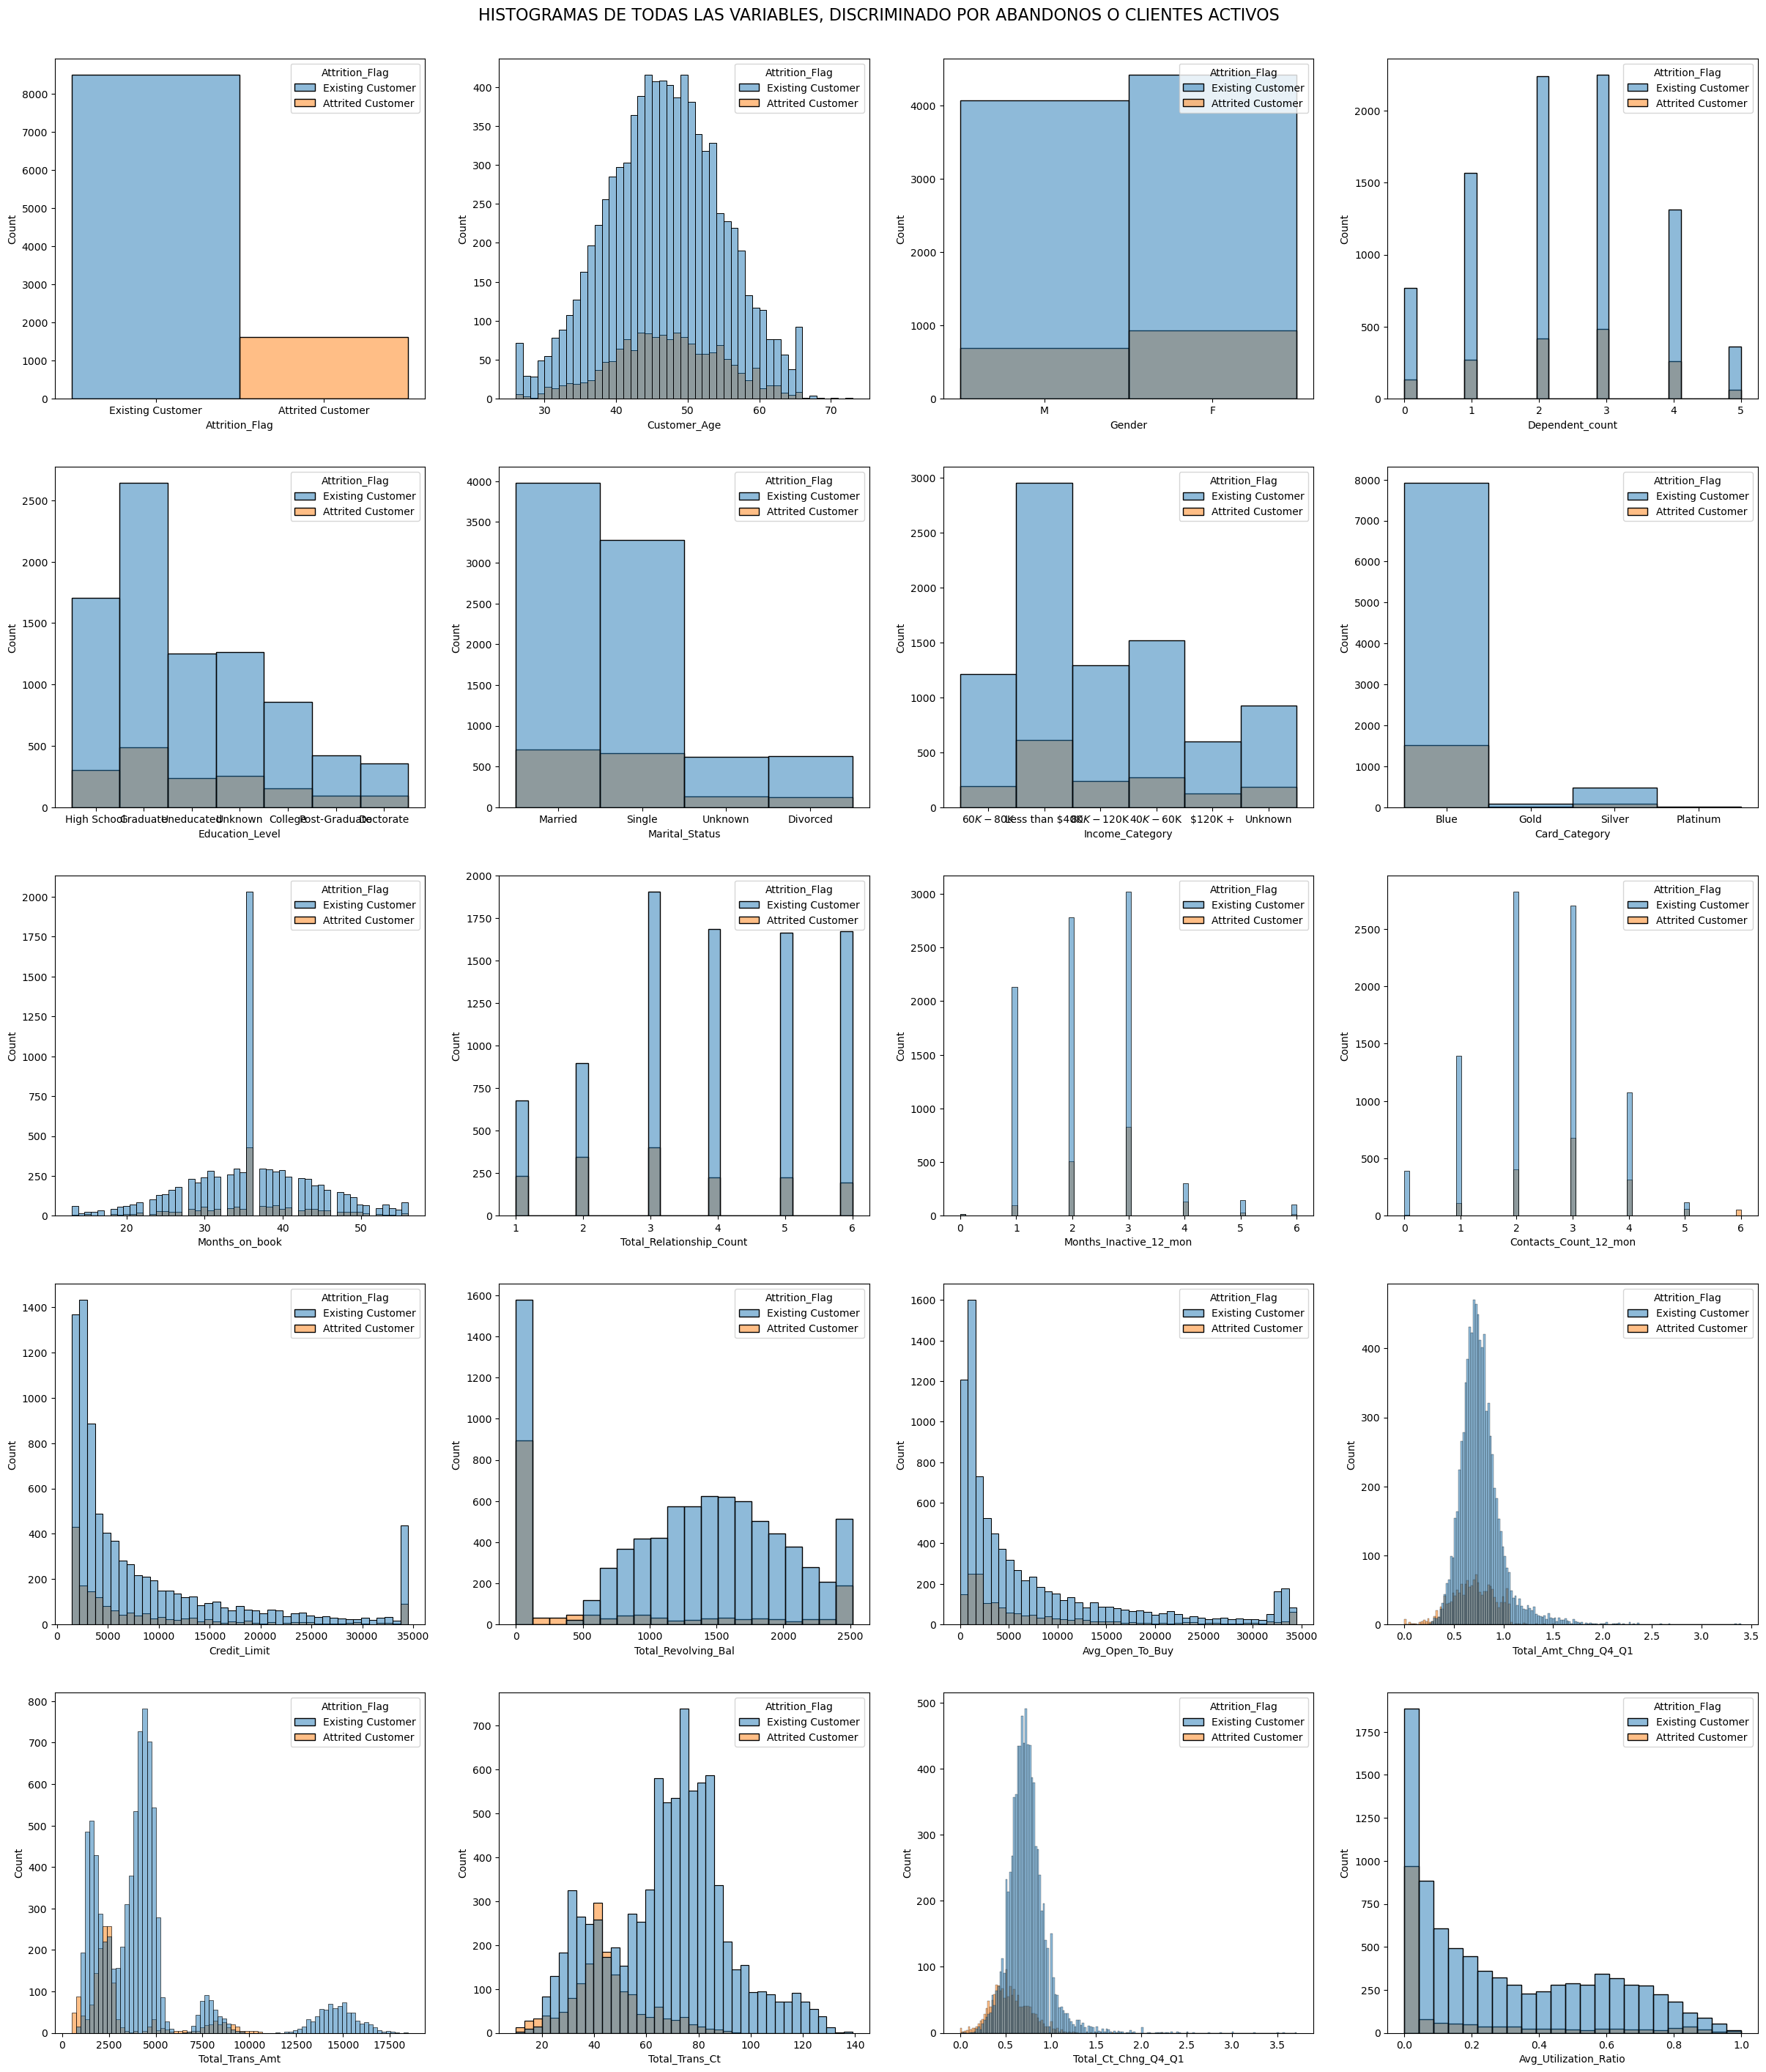

In [5]:
#  Se arma una lista con los nombres de las columnas para usarla a continuacion

fig , axes = plt.subplots(5,4,figsize = (30,35))
plt.suptitle('HISTOGRAMAS DE TODAS LAS VARIABLES, DISCRIMINADO POR ABANDONOS O CLIENTES ACTIVOS',fontsize=16,y = 0.9)
i = 0
for fil in range(5):
  for col in range(4):
    if i <=20:                     #esta condicion se plantea ya que las ultimas 2 columnas del dataset no hay que usarlas para analisi segun la pagina
        sns.histplot(data=bank_df,
              ax=axes[fil,col],
              x=columns_name[i],
              hue = 'Attrition_Flag'
              )
        i = i + 1
plt.show()

## Graficos detallados de cada variable


### Variables numericas

In [85]:
var_num = bank_df.select_dtypes(include = ["number"]).columns

In [43]:
print(f'analisis grafico de {var_num[0]}')

analisis grafico de Customer_Age


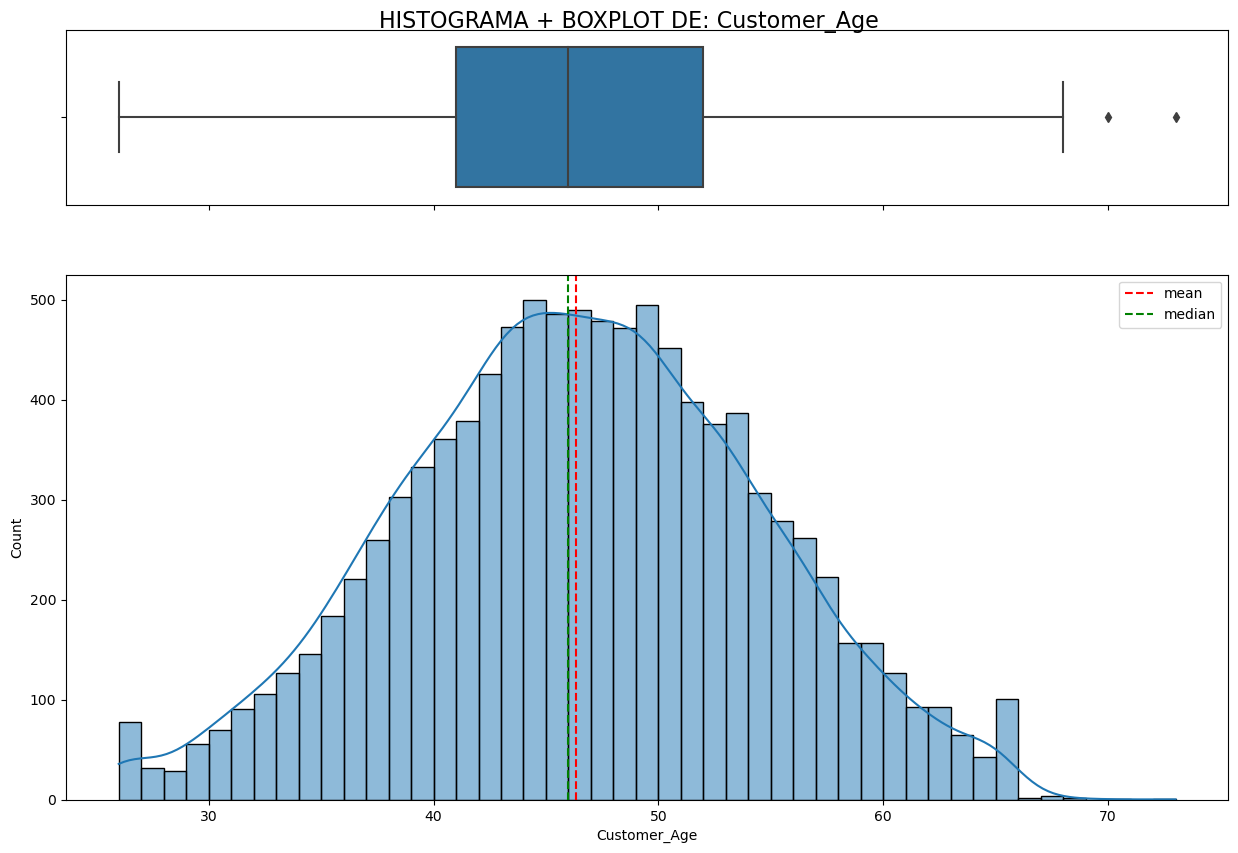

In [44]:
hist_box(var_num[0],None)

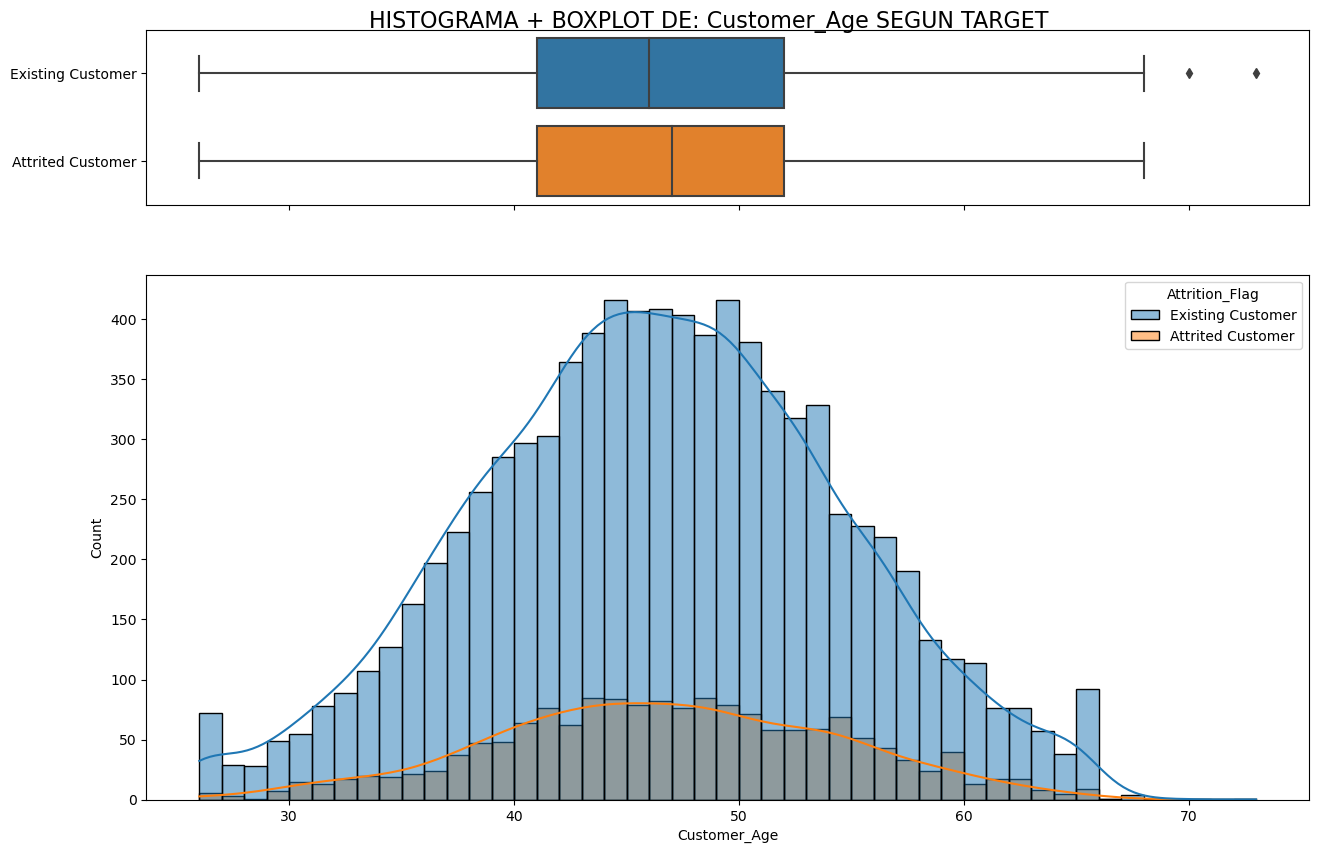

In [51]:
hist_box(var_num[0],'Attrition_Flag')

Como era de esperarse, la distribucion de los datos de las edades es normal. Presentando muy pocos outliers.

In [45]:
print(f'analisis grafico de {var_num[1]}')

analisis grafico de Dependent_count


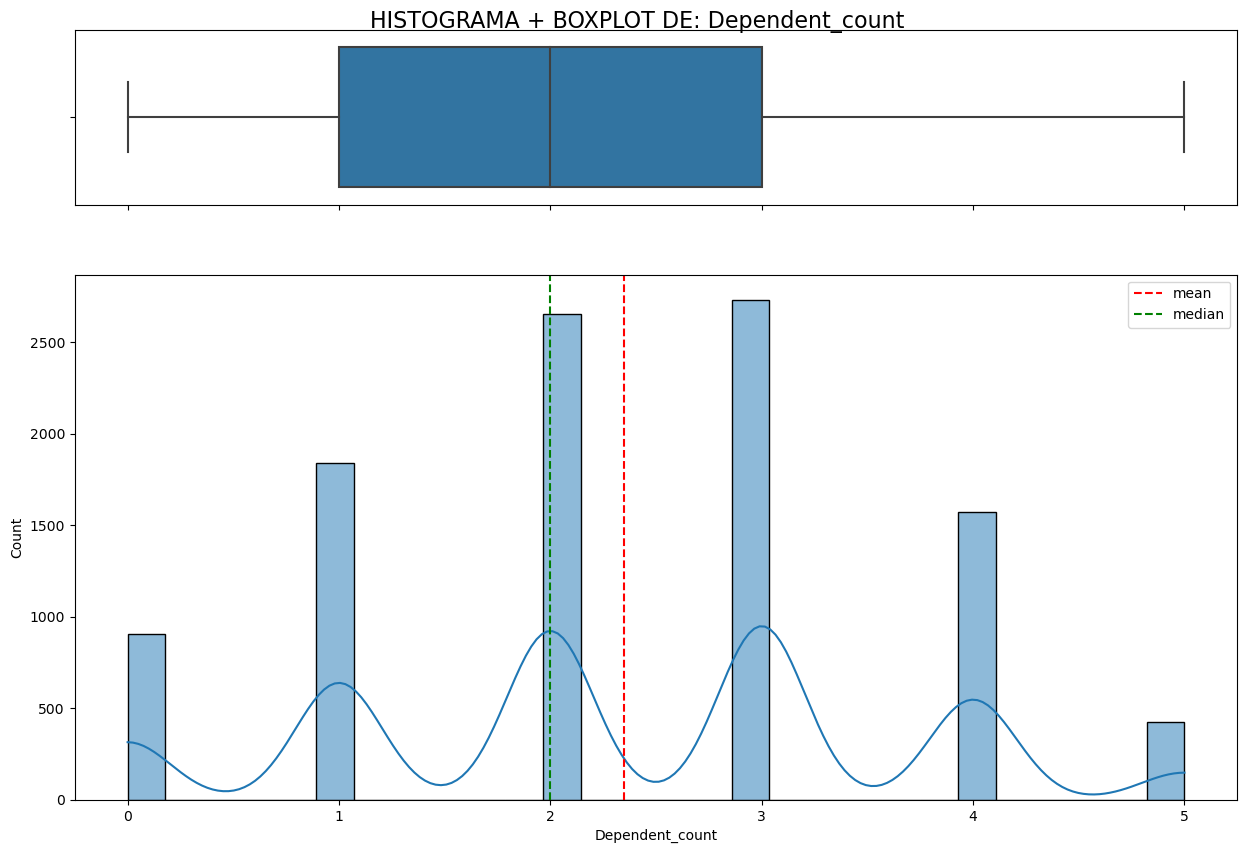

In [46]:
hist_box(var_num[1],None)

Este grafico tiene esta forma porque la cantidad de cuentas es un numero entero. Por lo tanto, podria considerarse como categorica.

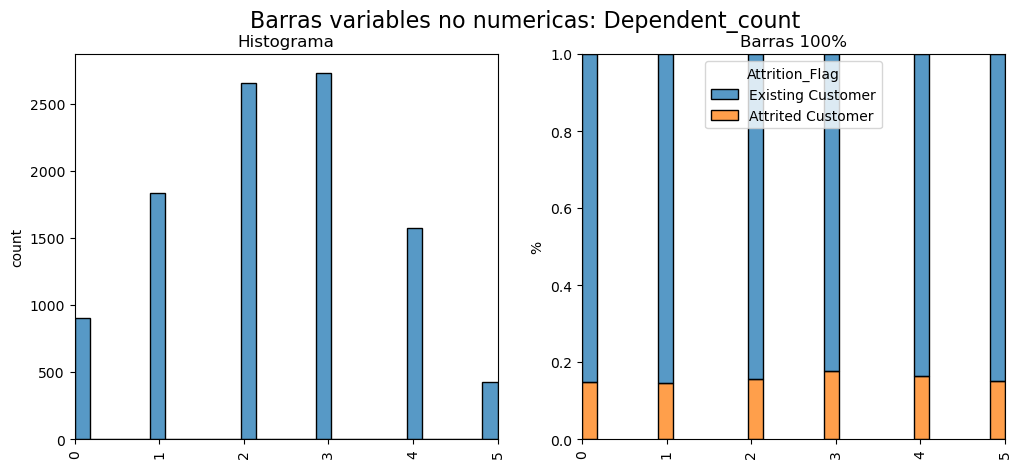

In [47]:
graf_cat(var_num[1])

El histograma muestra que la mayoria de las personas tienen entre 2 y 3 cuentas dependientes. Por otro lado, las barras al 100%, mostrarian que no hay un comportamiento diferente para ninguna de las categorias desde el punto de vista del target.

In [48]:
print(f'analisis grafico de {var_num[2]}')

analisis grafico de Months_on_book


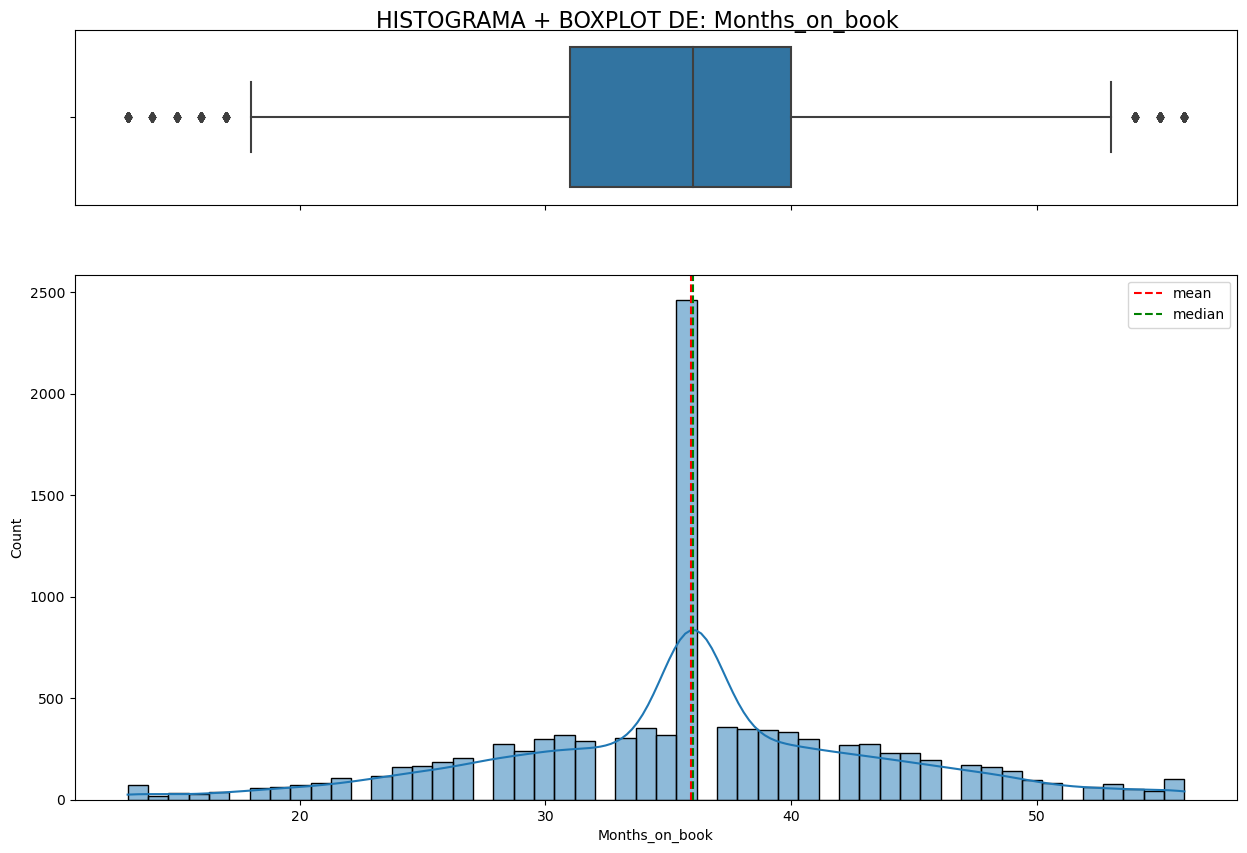

In [49]:
hist_box(var_num[2],None)

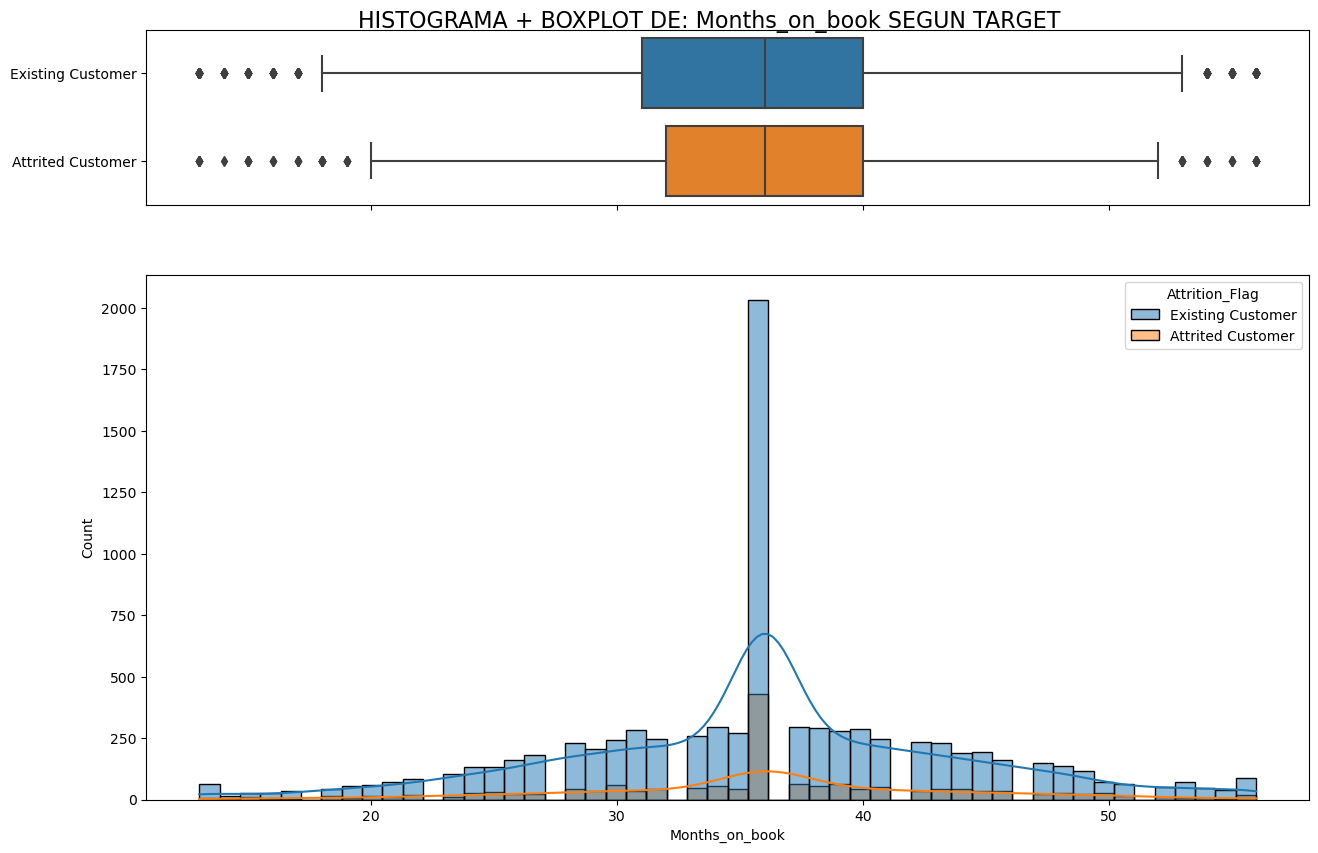

In [50]:
hist_box(var_num[2],'Attrition_Flag')

Para la variable meses en los libros podemos observar un valor predominante, que es 36 meses. Esto se mantiene para ambas categorias analizadas

In [52]:
print(f'analisis grafico de {var_num[3]}')

analisis grafico de Total_Relationship_Count


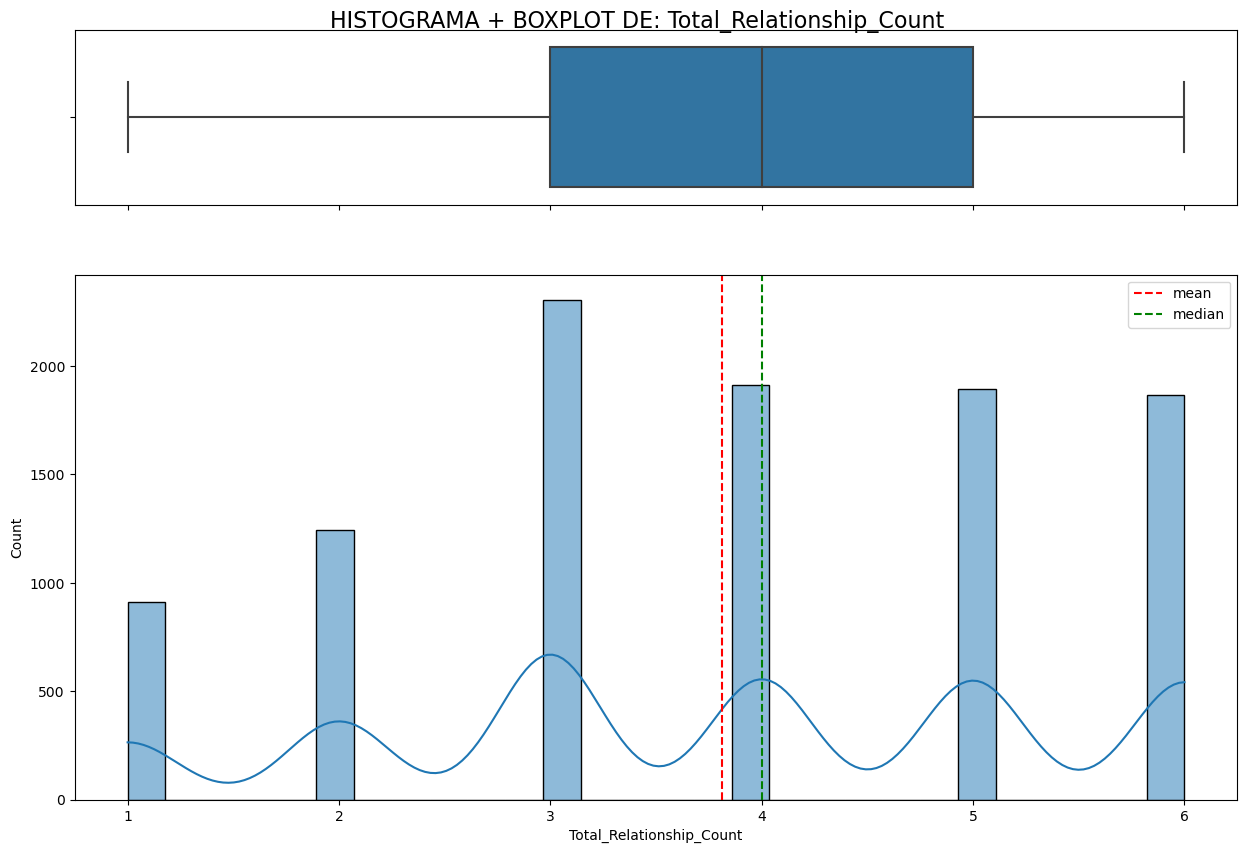

In [53]:
hist_box(var_num[3],None)

Con esta variable sucede lo mismo que con la cantidad de cuentas dependientes. Podemos considerarla como categorica o discreta.

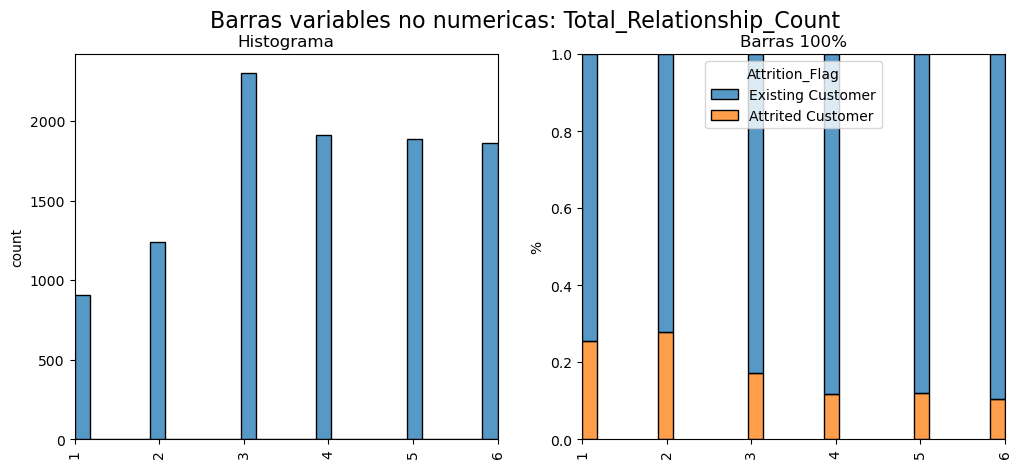

In [54]:
graf_cat(var_num[3])

El histograma muestra que la mayoria de las personas tienen mas de 3 cuentas dependientes. Las barras agrupadas, por otro lado, muestran que las personas que tienen 2 o menos cuentas dependientes tienen un mayor abandono que las demas.

In [55]:
print(f'analisis grafico de {var_num[4]}')

analisis grafico de Months_Inactive_12_mon


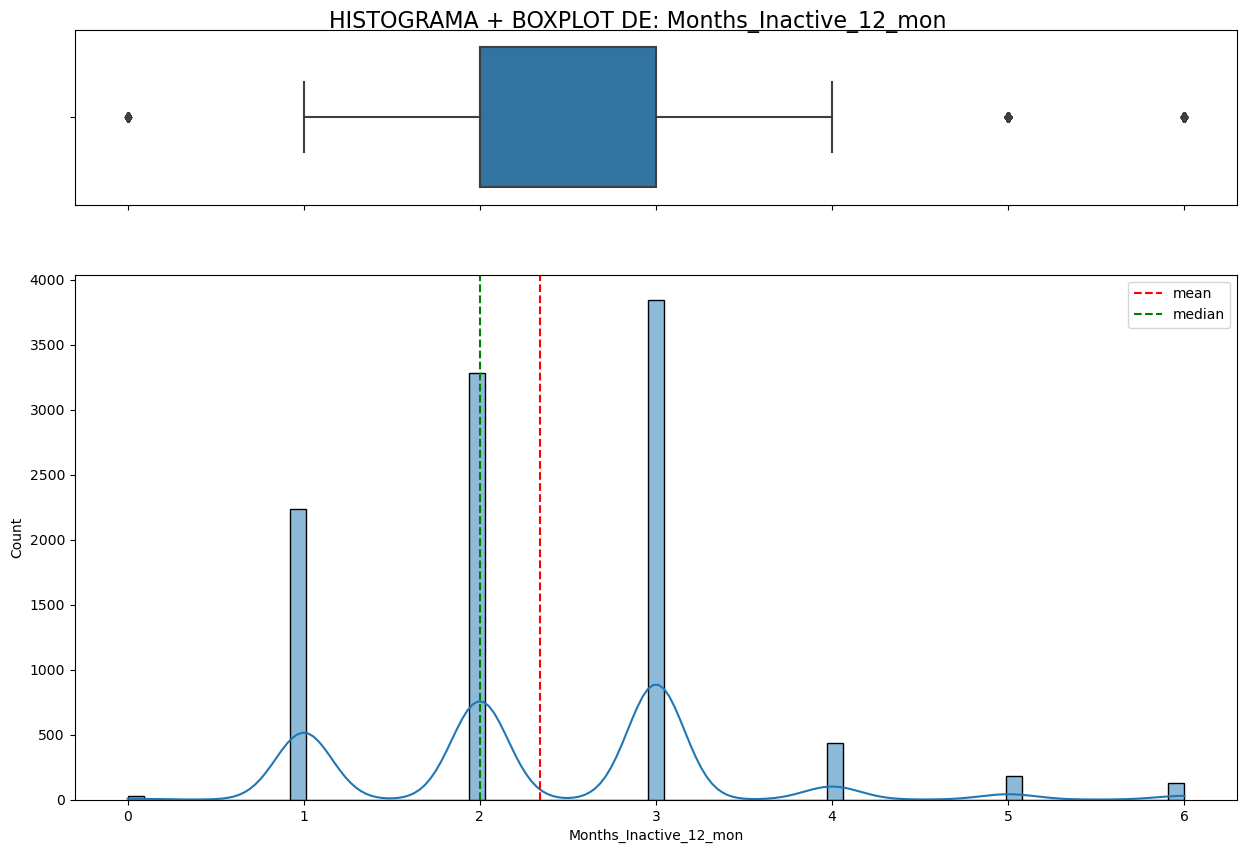

In [56]:
hist_box(var_num[4],None)

Esta varable tambien es discreta. Y tambien podemos observar una gran tendencia a que el total de las observaciones estan 2 o 3 meses inactivos.

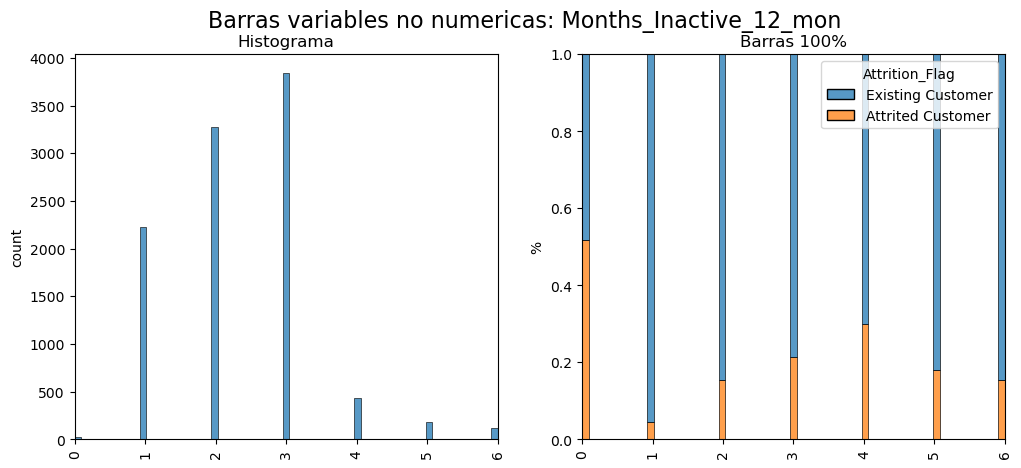

In [57]:
graf_cat(var_num[4])

Observando los datos mas significantes, es decir esos clientes que pasan 1, 2 o 3 meses inactivos, podemos decir que a medida que aumentan los meses de inactividad, hay mayor porcentaje de abandono del servicio.

In [58]:
print(f'analisis grafico de {var_num[5]}')

analisis grafico de Contacts_Count_12_mon


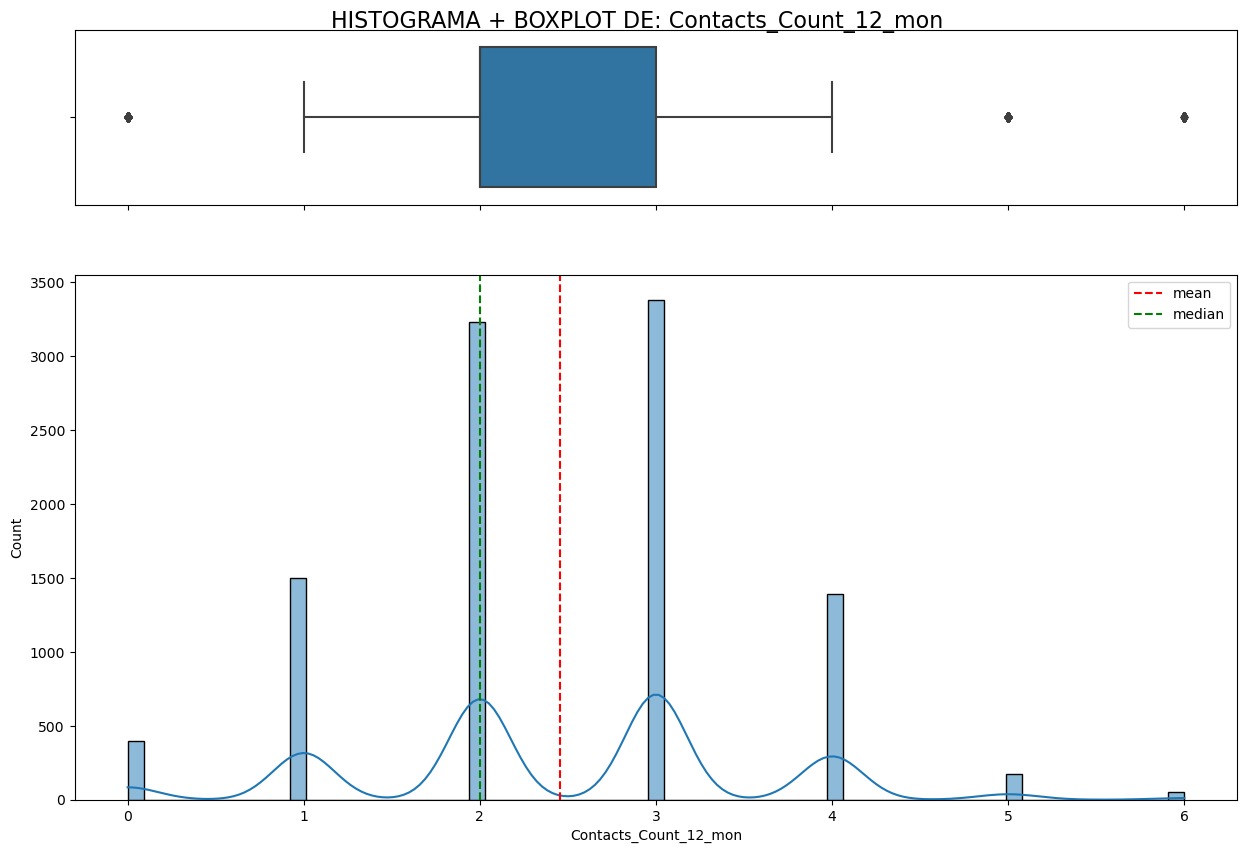

In [59]:
hist_box(var_num[5],None)

Variable discreta, puede observarse una concenrtacion en 2 y 3 cuentas contactadas en los ultimos 12 meses.

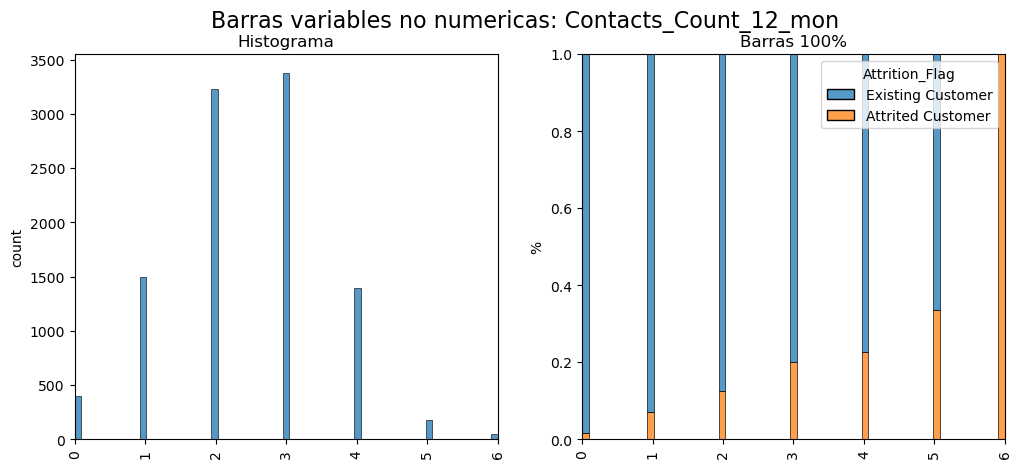

In [60]:
graf_cat(var_num[5])

Esta variable preseenta un comportamiento bastante marcado, podemos observar que mientras mas contactos tienen en los ultimos 12 meses, mas tasa de abandono existe.

In [61]:
print(f'analisis grafico de {var_num[6]}')

analisis grafico de Credit_Limit


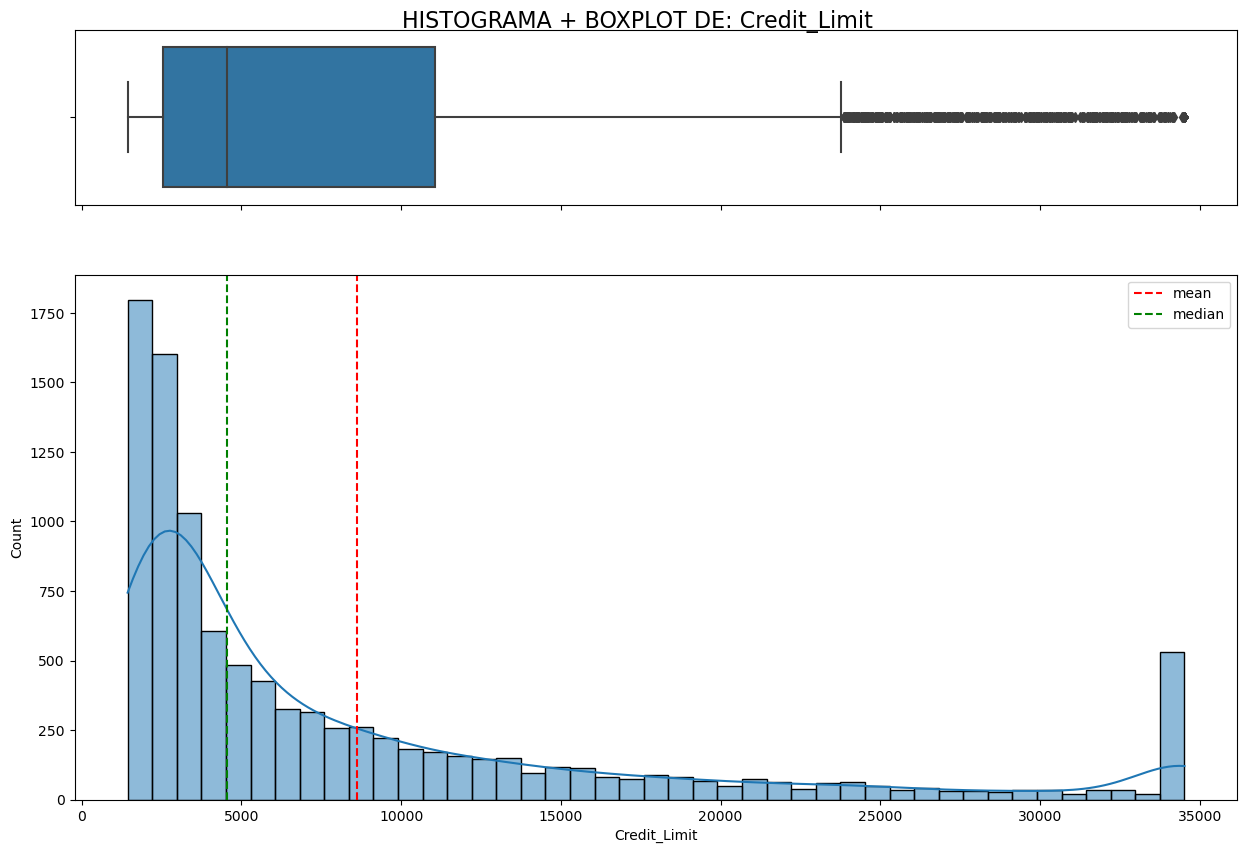

In [62]:
hist_box(var_num[6],None)

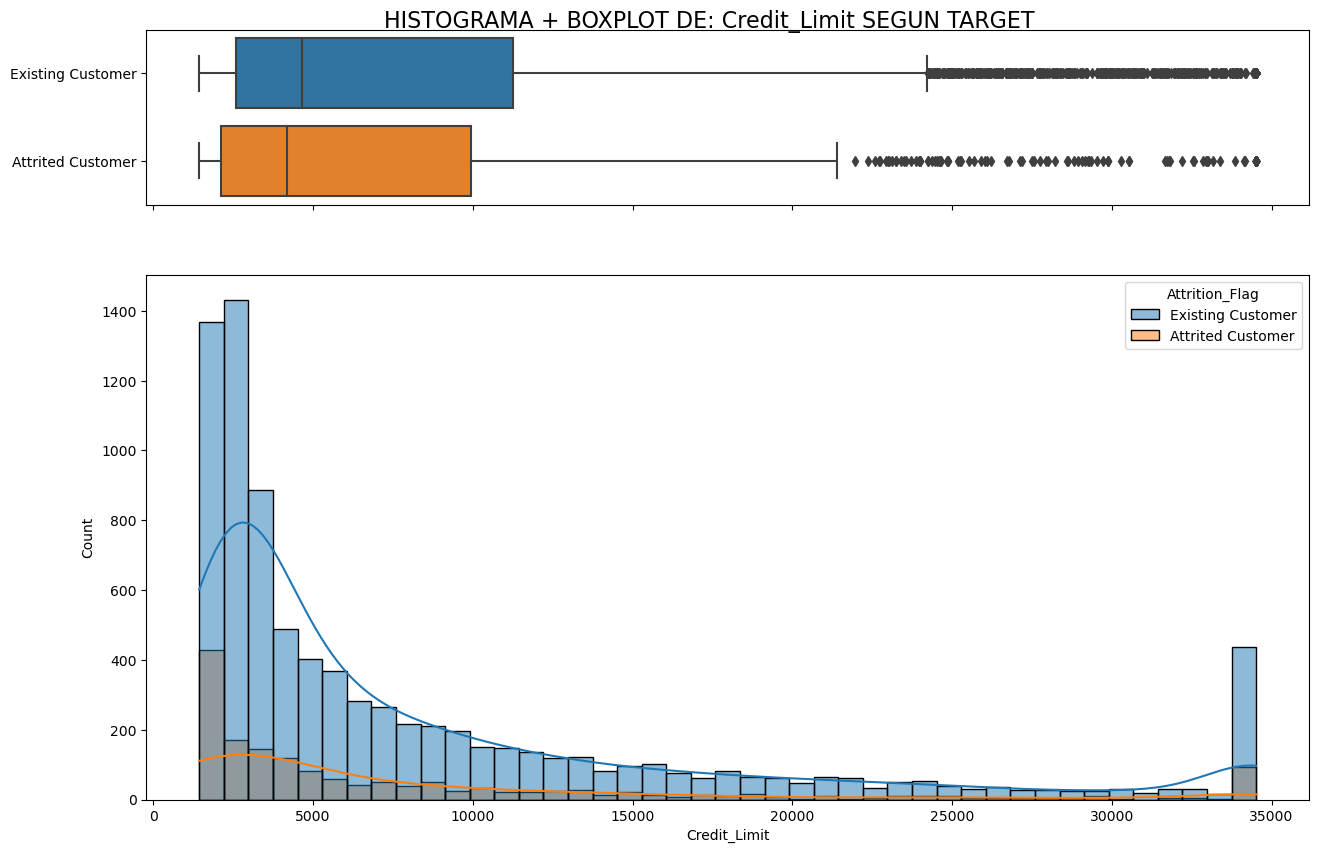

In [63]:
hist_box(var_num[6],'Attrition_Flag')

Podemos observar una distribucion muy sesgada a la derecha. Pero a su vez, podemos ver que tanto los clientes que abandonan como los que no abandonan el servicio siguen una misma distribucion.

Tambien es notoria la cantidad de outliers que presenta la variable

In [64]:
print(f'analisis grafico de {var_num[7]}')

analisis grafico de Total_Revolving_Bal


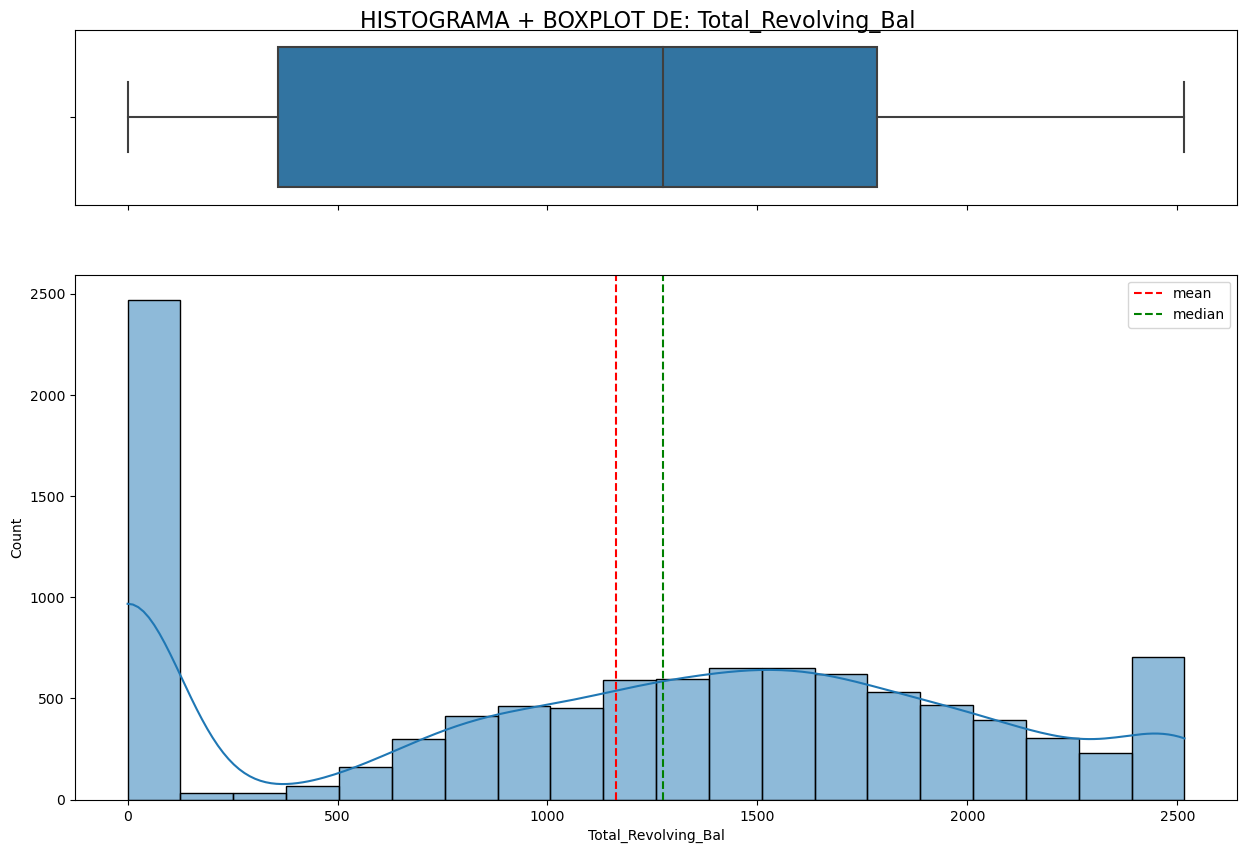

In [65]:
hist_box(var_num[7],None)

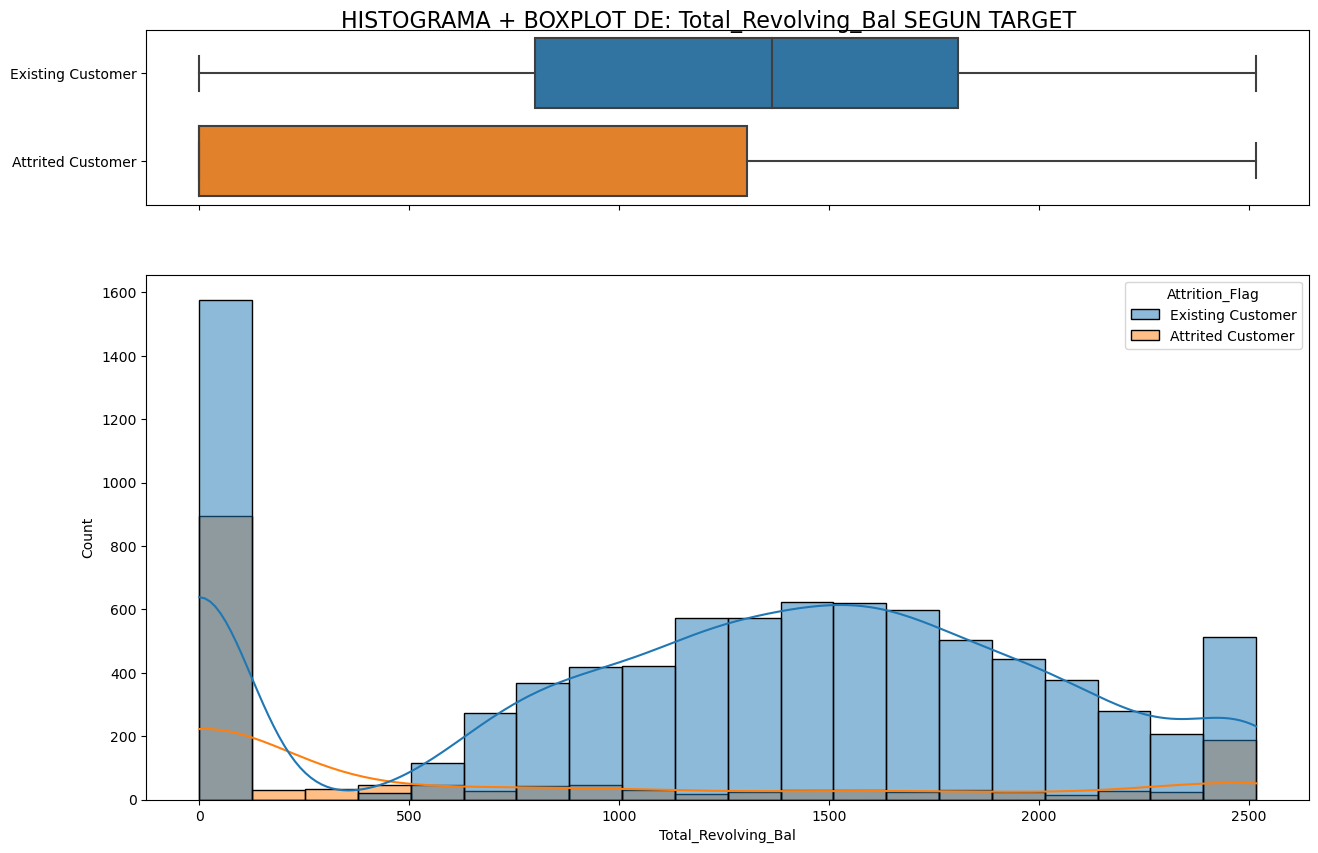

In [66]:
hist_box(var_num[7],'Attrition_Flag')

En esta variable, podemos detectar ciertos patrones. Si observamos el Boxplot, vemos que la gran mayoria(75%) de los clientes que abandonan el servicio tienen un Total_revolving_bal menor a 1300, que seria hasta el Q3 de la categoria Attrited Customer. Por otro lado, la mediana de los Existing Customers, sobrepasa este valor, siendo de aproximadamente 1400.

Tambien se puede observar para ambas cateogiras una gran concentracion de datos en el valor = 0

In [67]:
print(f'analisis grafico de {var_num[8]}')

analisis grafico de Avg_Open_To_Buy


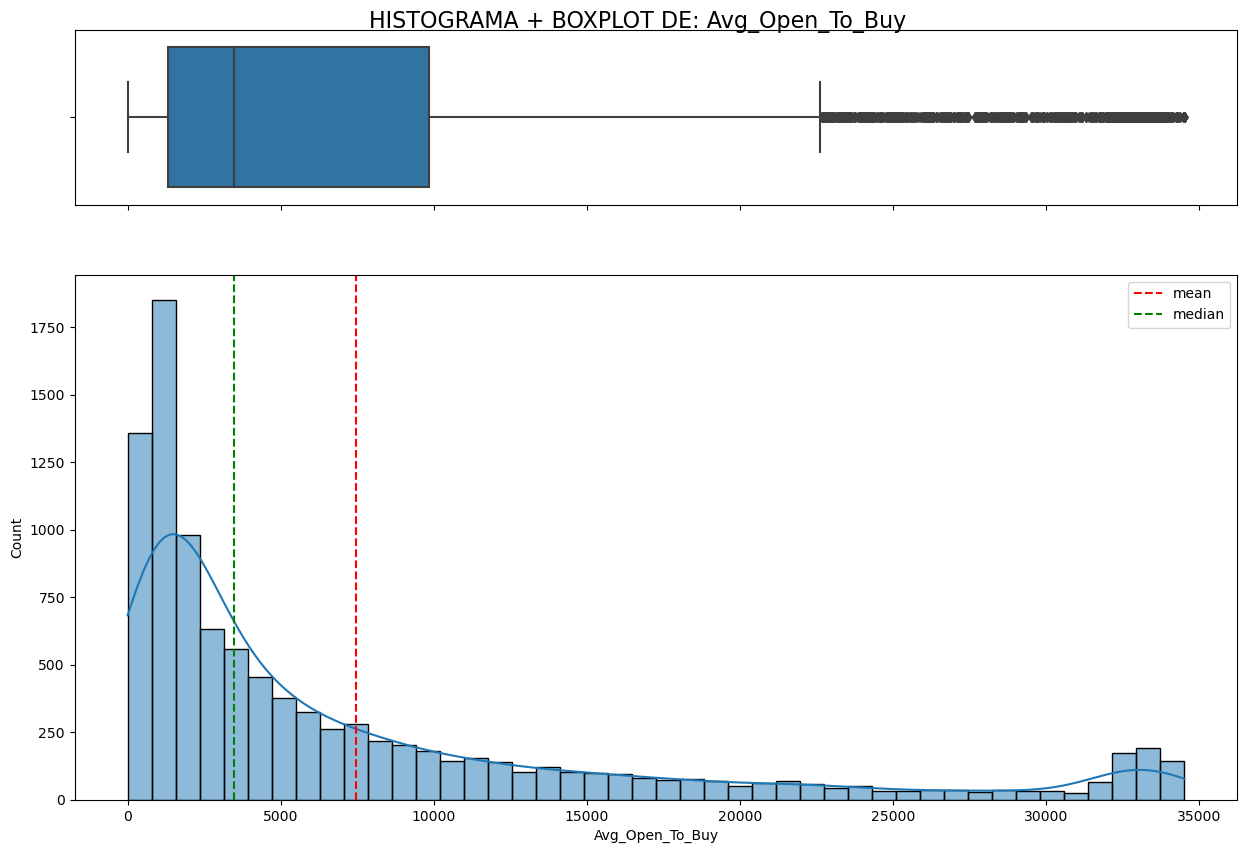

In [68]:
hist_box(var_num[8],None)

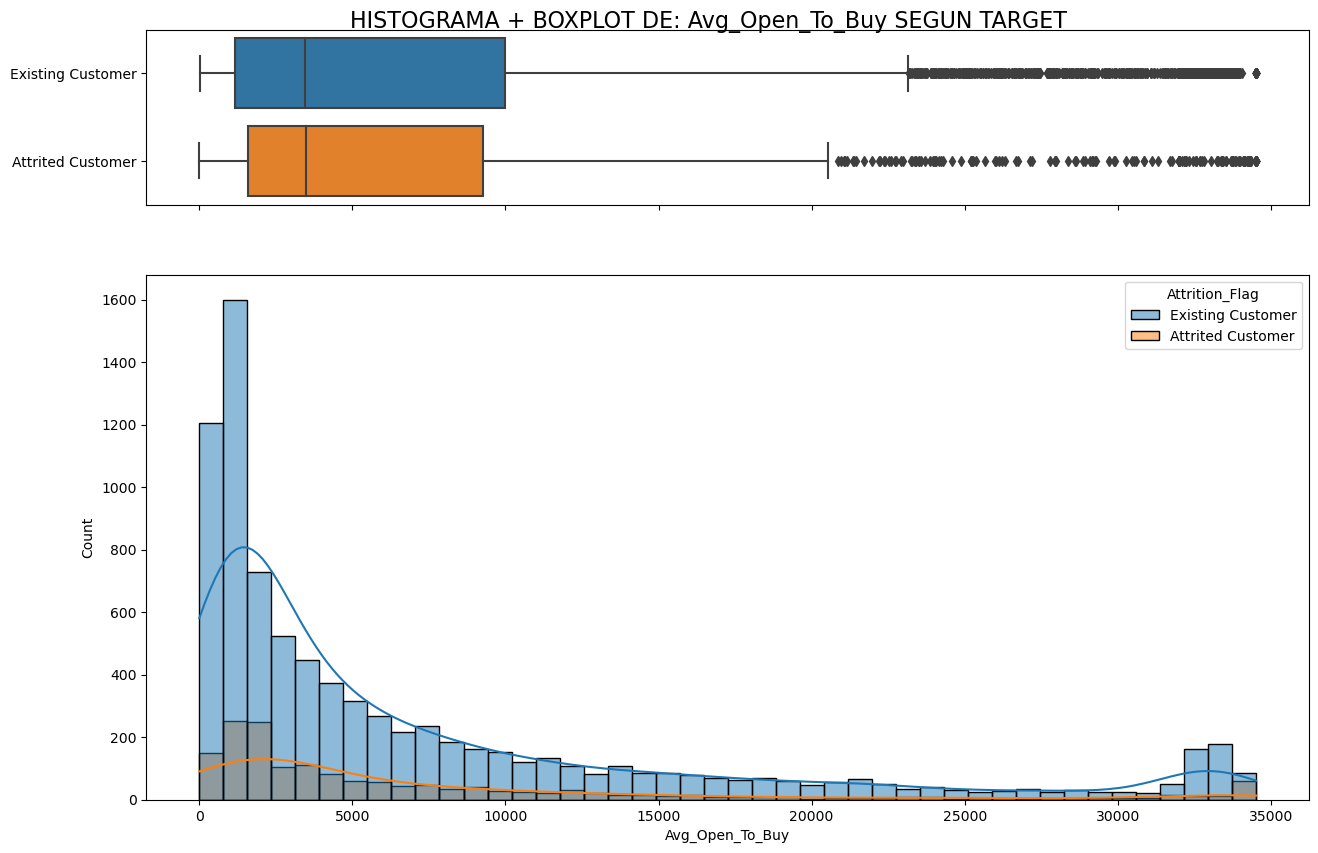

In [69]:
hist_box(var_num[8],'Attrition_Flag')

Podemos observar una distribucion muy sesgada a la derecha. Pero a su vez, podemos ver que tanto los clientes que abandonan como los que no abandonan el servicio siguen una misma distribucion.

Tambien es notoria la cantidad de outliers que presenta la variable

DATO: La distribucion es muy similar a la de Credit_limit

In [70]:
print(f'analisis grafico de {var_num[9]}')

analisis grafico de Total_Amt_Chng_Q4_Q1


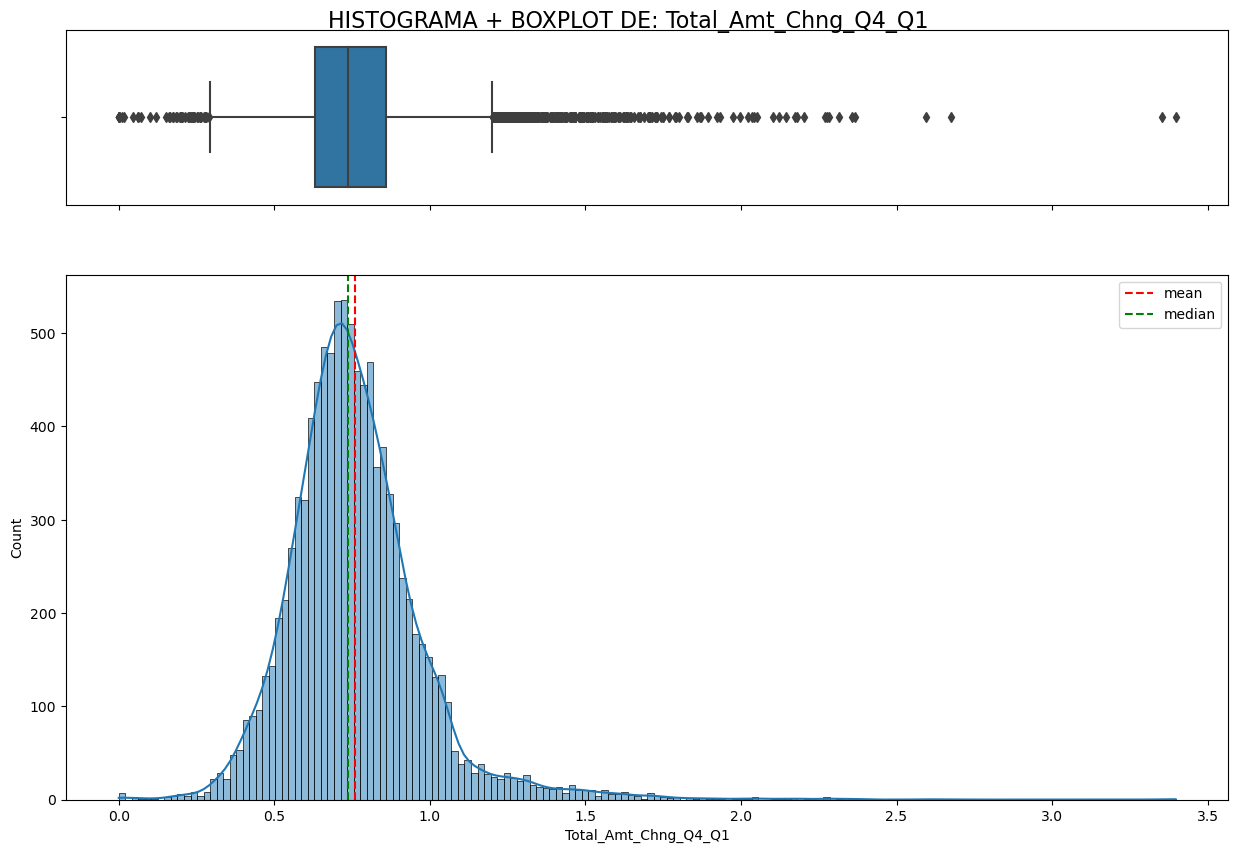

In [71]:
hist_box(var_num[9],None)

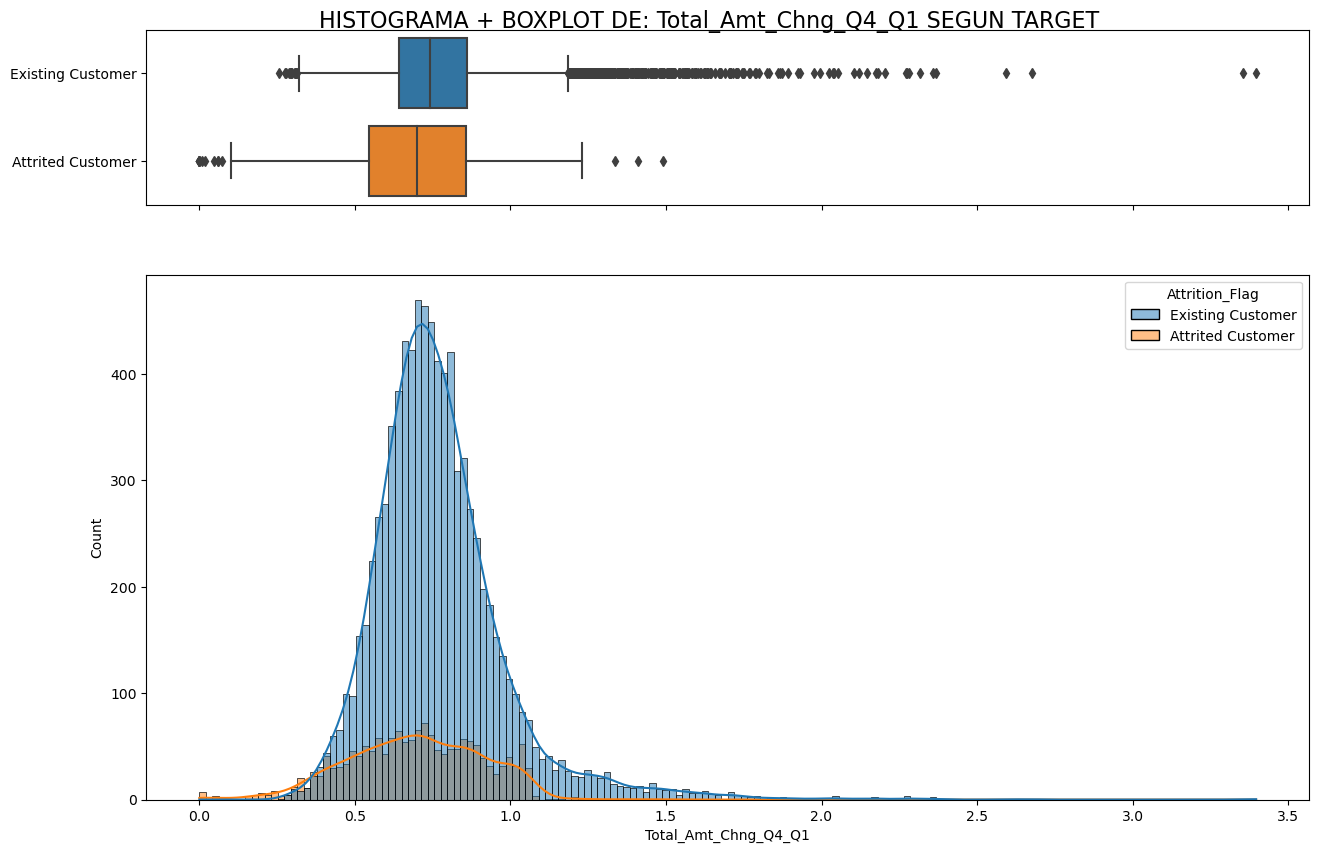

In [72]:
hist_box(var_num[9],'Attrition_Flag')

Esta variablee presenta gran cantidad de outliers.

Por otro lado, podemos observar que para el caso de los Existing Customers, los datos estan mucho mas conceentrados, tendiendo al valor central.

Para los Attrited Customer la distribucion es mucho mas plana.

In [73]:
print(f'analisis grafico de {var_num[10]}')

analisis grafico de Total_Trans_Amt


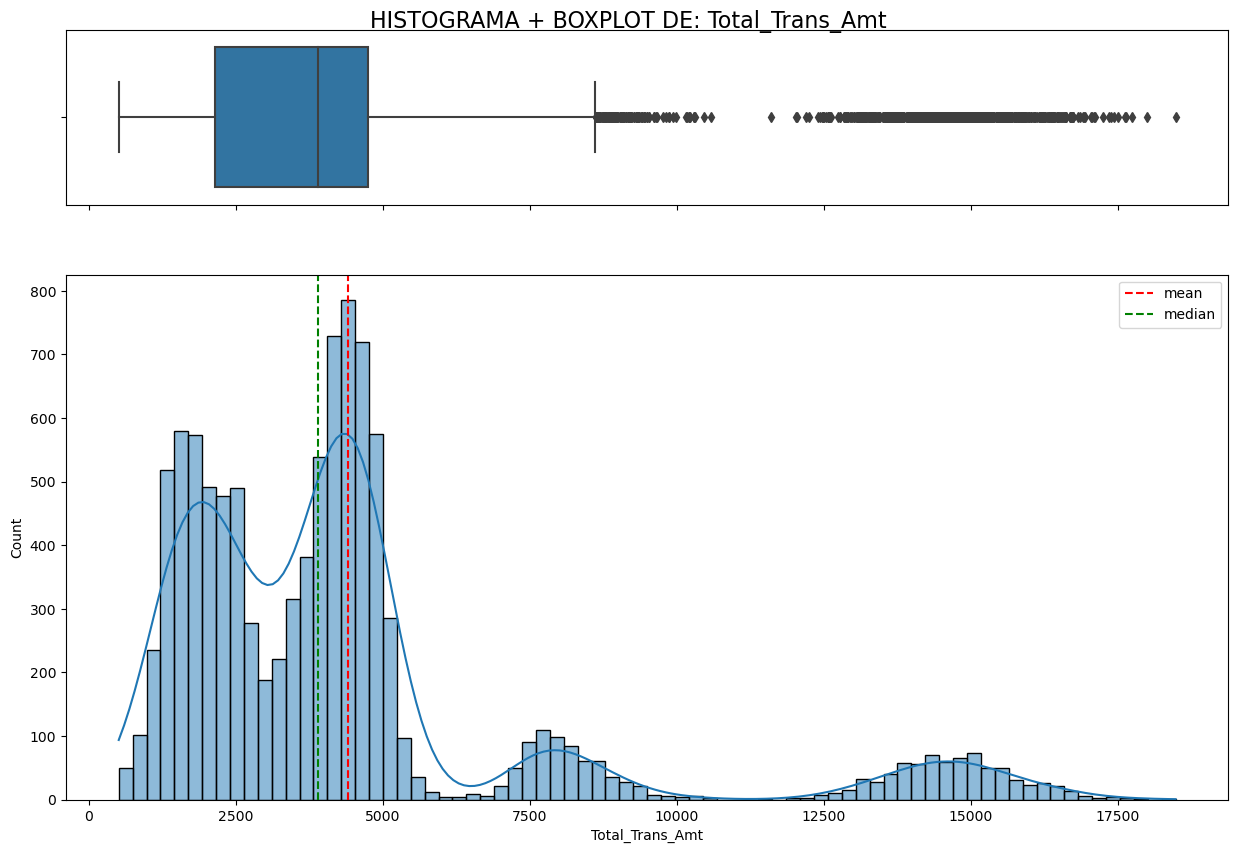

In [74]:
hist_box(var_num[10],None)

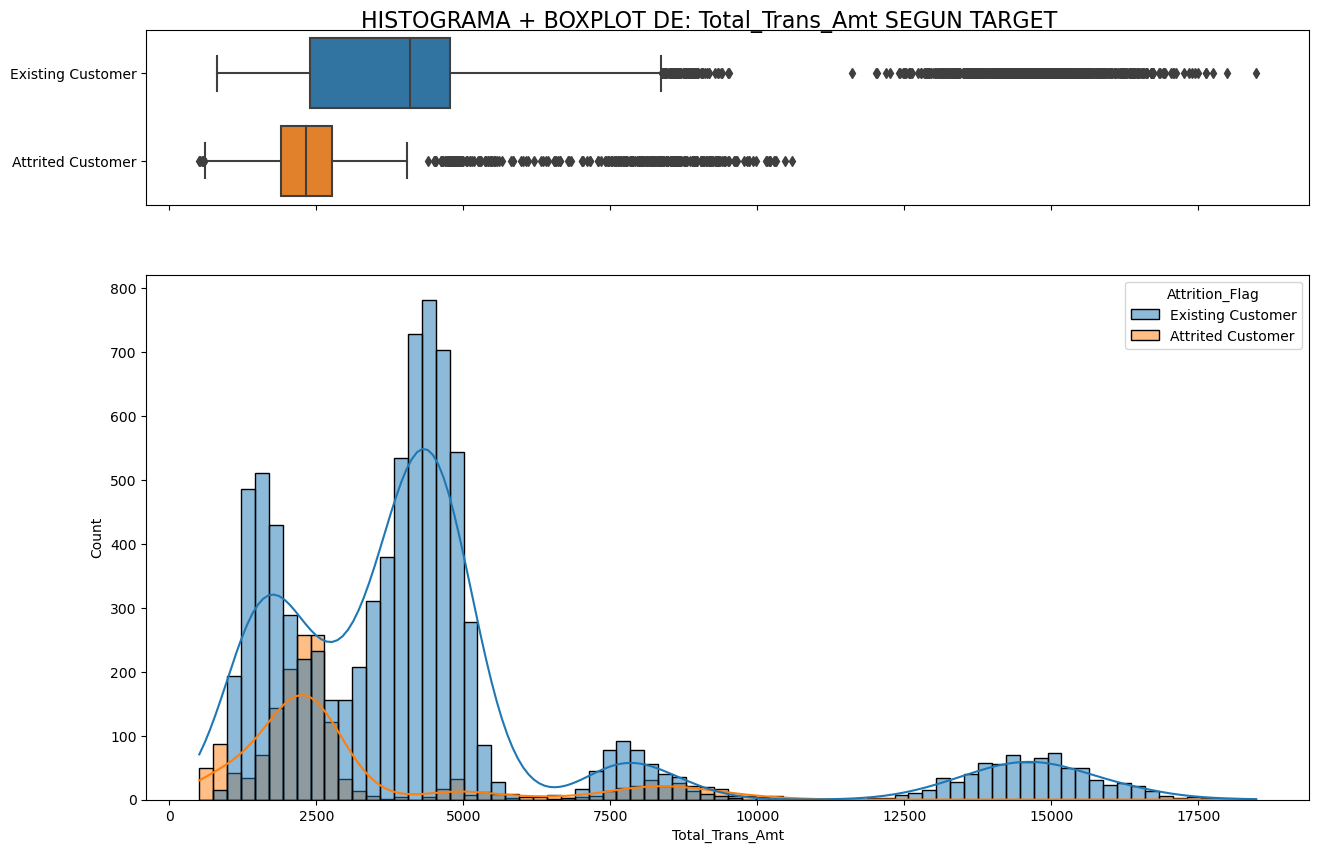

In [75]:
hist_box(var_num[10],'Attrition_Flag')

Esta variable tiene una distribucion presenta dos picos, y ademas se comporta de maneras difeerentes segun el Target.

Tambien podemos ver que la variable posee una gran cantidad de outliers

Podriamos decir que NO abandonaran el servicio las personas que tengan un total de transacciones mayor al Q3 (75%) correspondiente a la categoria Attrited Customer

In [76]:
print(f'analisis grafico de {var_num[11]}')

analisis grafico de Total_Trans_Ct


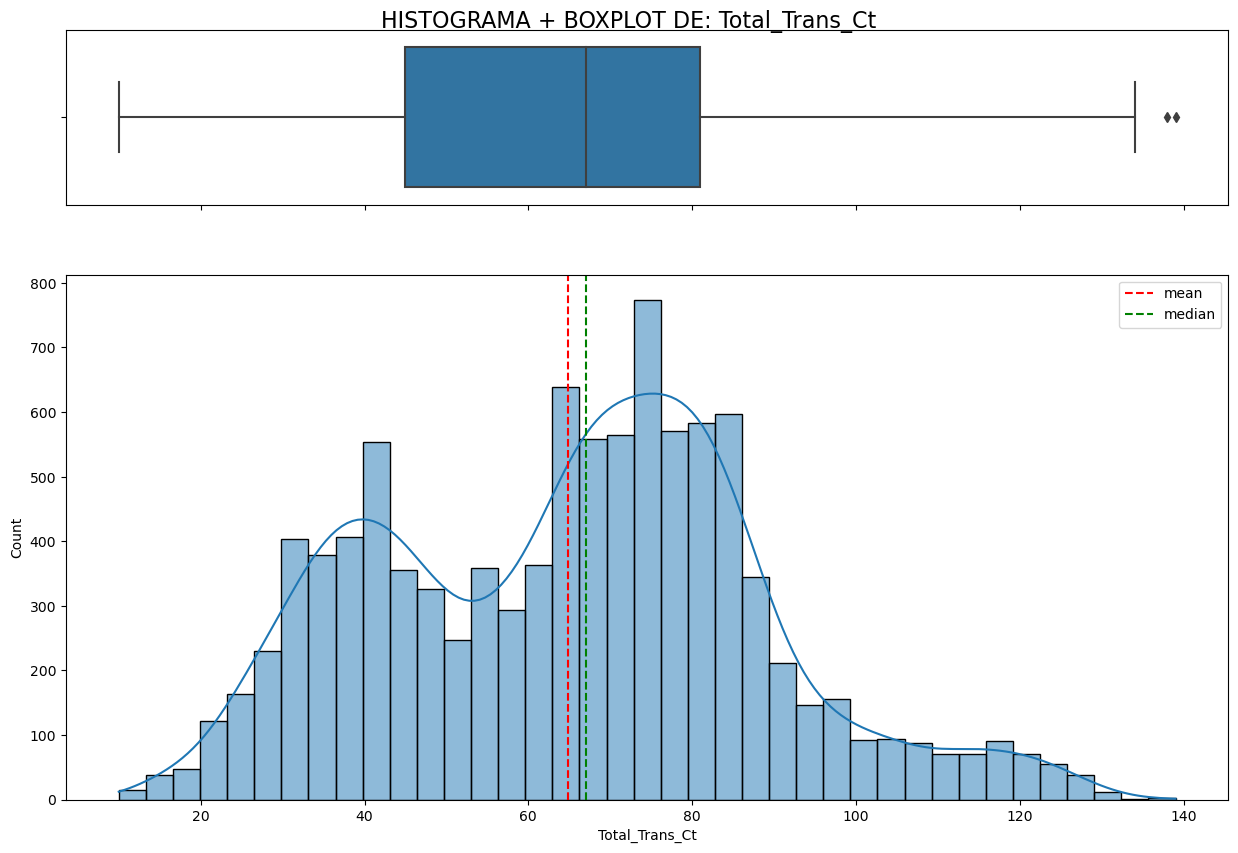

In [77]:
hist_box(var_num[11],None)

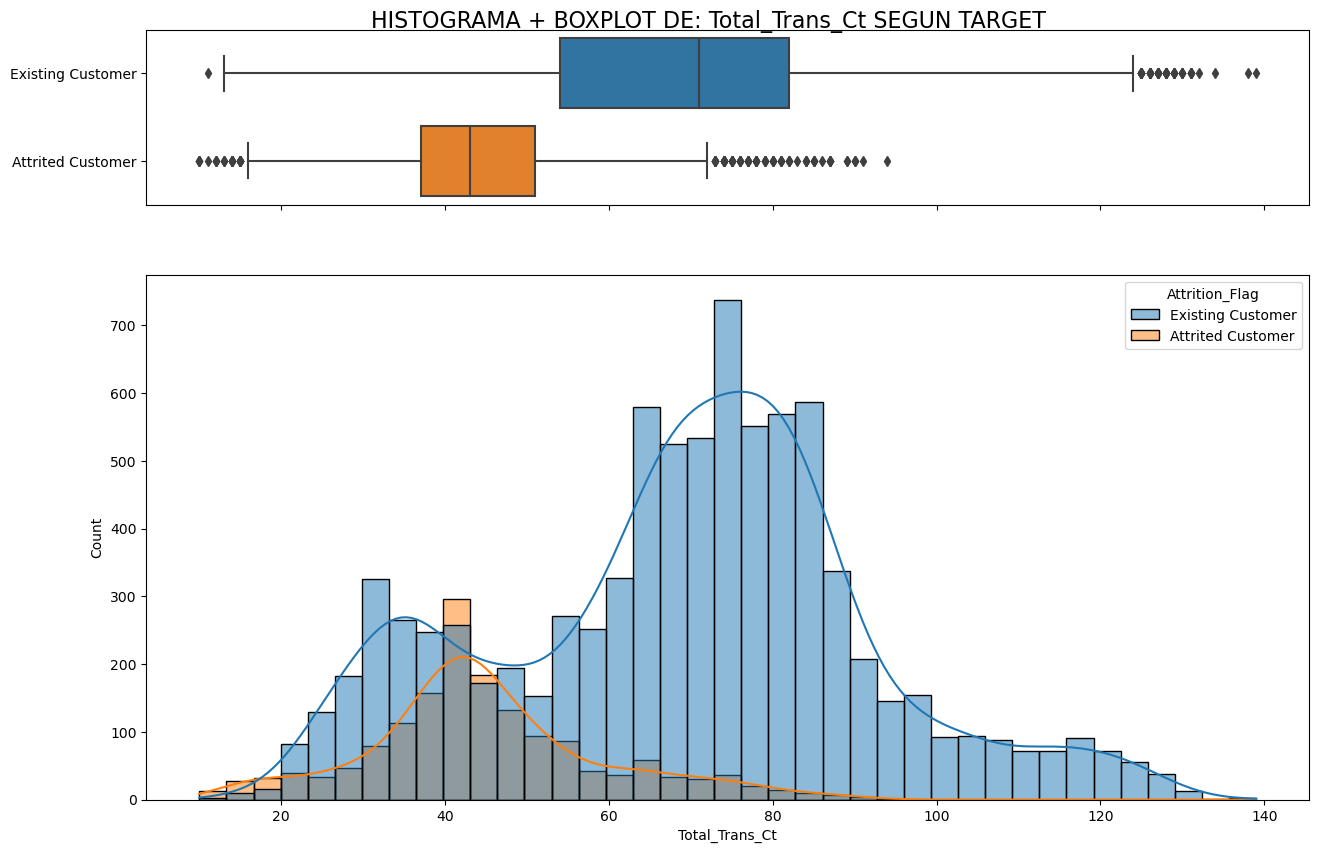

In [78]:
hist_box(var_num[11],'Attrition_Flag')

Esta otra variable tambien tiene un comprotamieento muy marcado en cuanto a las distribuciones segun los dos targets.

Podriamos decir que NO abandonaran el servicio las personas que tengan una cantidad total de transacciones mayor al Q3 (75%) correspondiente a la categoria Attrited Custome. Aprox +50 transacciones


In [79]:
print(f'analisis grafico de {var_num[12]}')

analisis grafico de Total_Ct_Chng_Q4_Q1


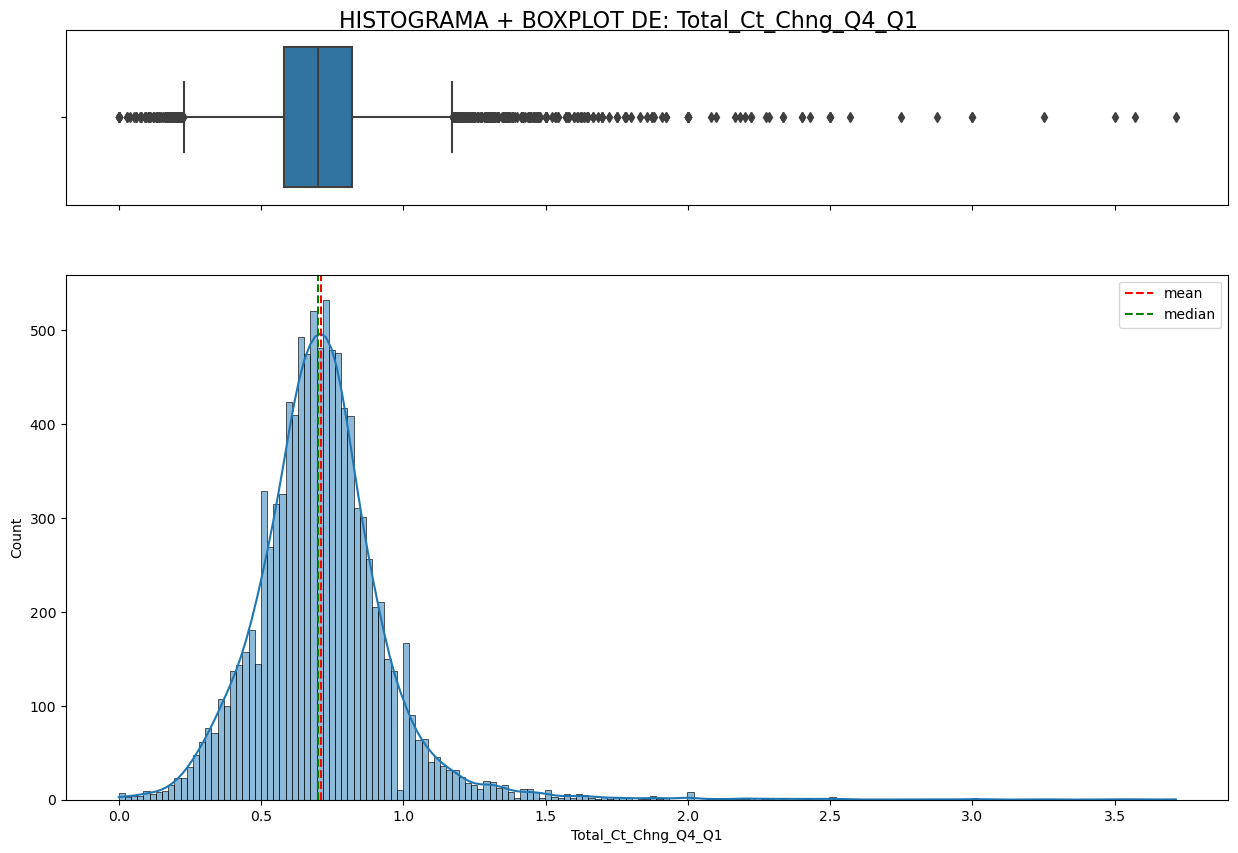

In [80]:
hist_box(var_num[12],None)

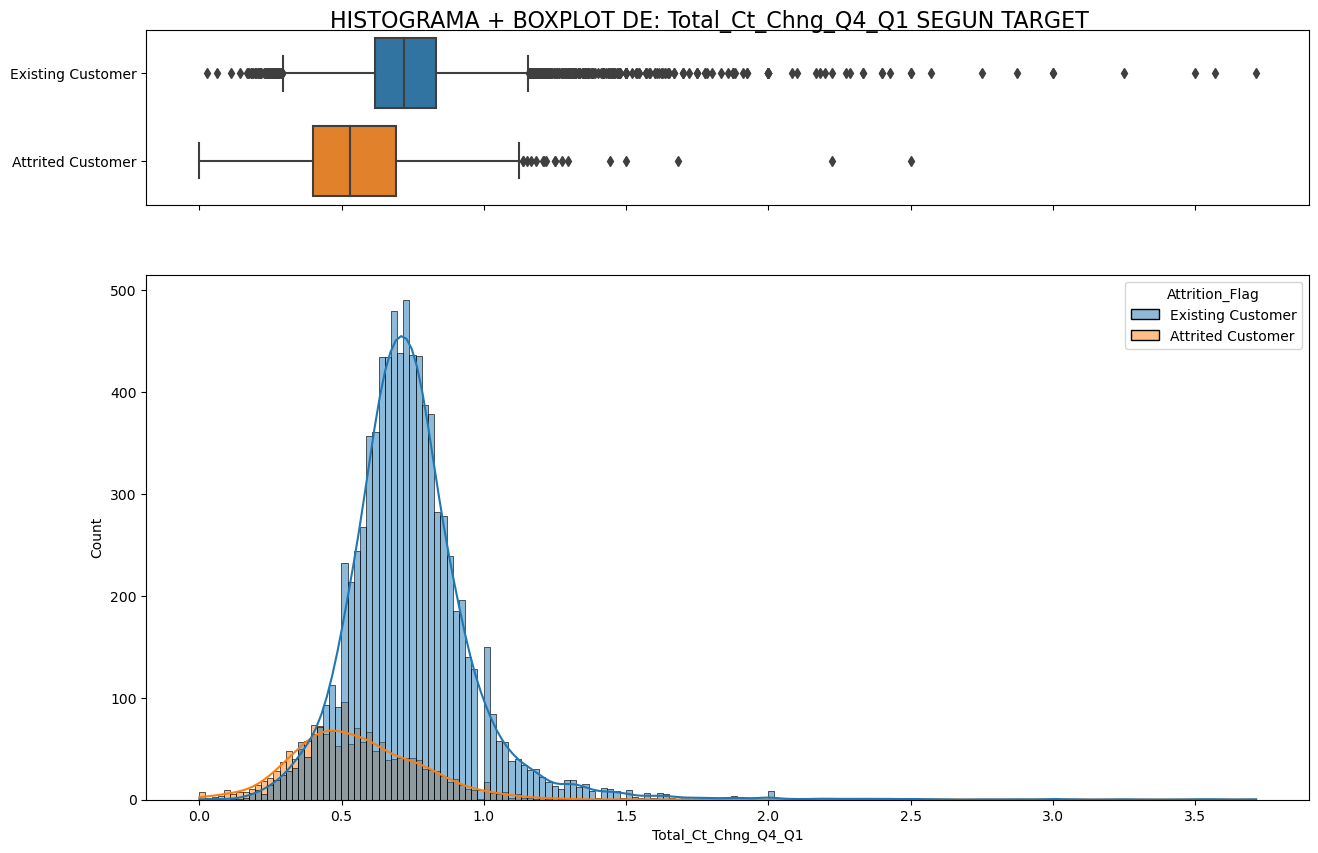

In [81]:
hist_box(var_num[12],'Attrition_Flag')

Esta variable tambien contiene gran cantidad de outliers. pero puede verse una diferencia en el comportamiento segun el target. Los clientes que abandonan tienen una tendencia a reducir en mayor medida la cantidad de transacciones que hacen a lo largo del año. Siendo 0.5 la media para estos clientes VS 0.75 aproximadamente para los clientes que no abandonan el servicio.

In [82]:
print(f'analisis grafico de {var_num[13]}')

analisis grafico de Avg_Utilization_Ratio


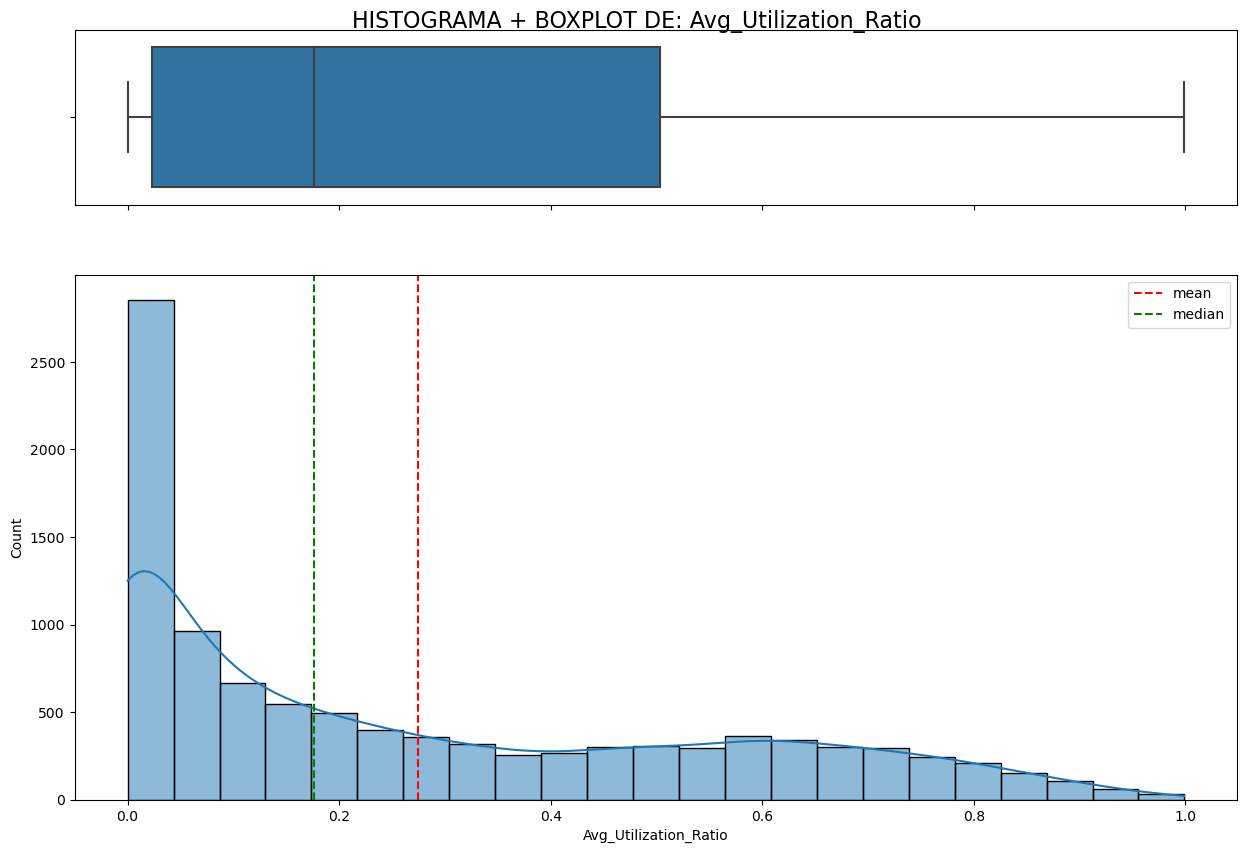

In [83]:
hist_box(var_num[13],None)

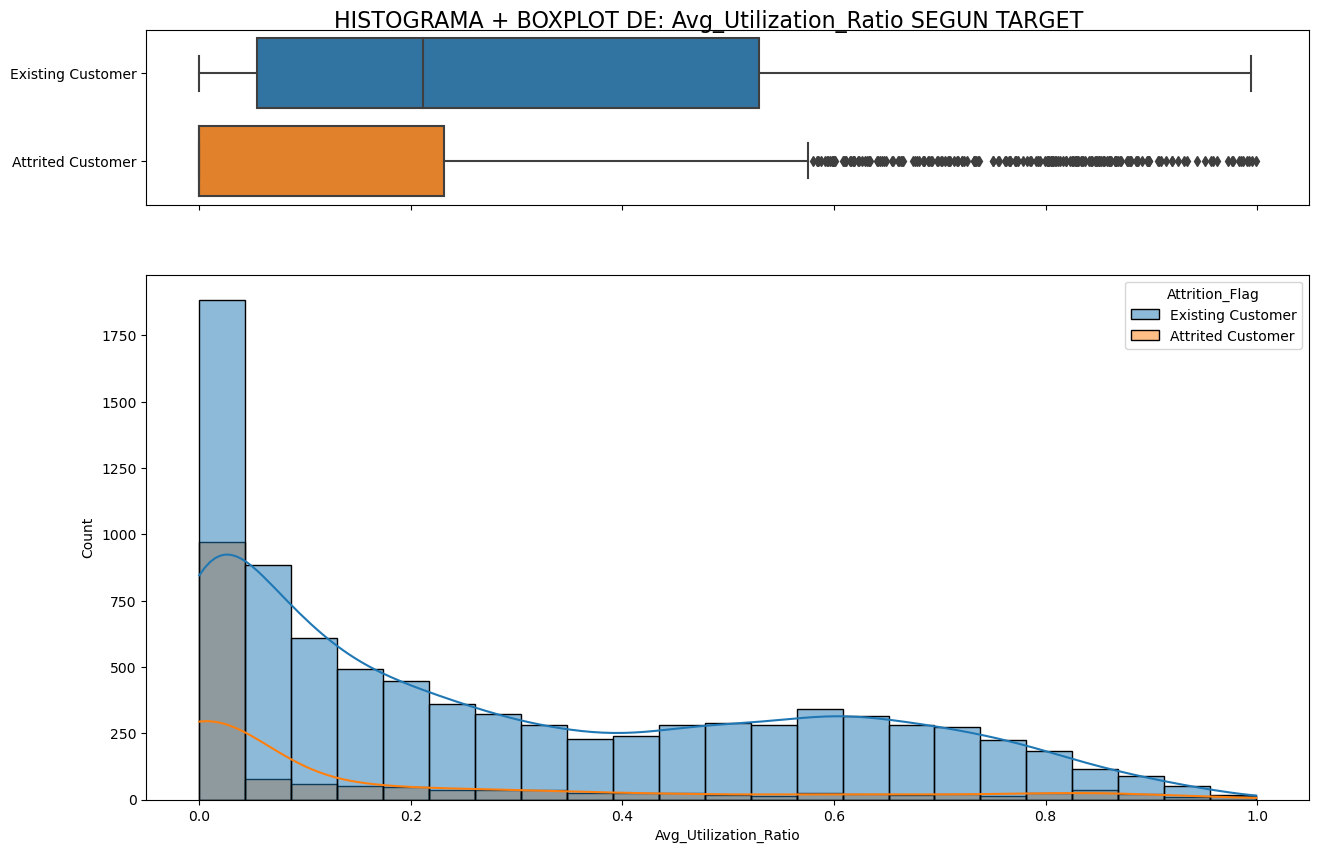

In [84]:
hist_box(var_num[13],'Attrition_Flag')

Podemos observar una distribucion muy sesgada a la derecha.

Tambien es posible observar, que si bien existe alguna similitud entre la distribucion para las dos categorias, estas no son iguales. En el boxplot es notorio que los clientes que abandonan tienen un menor ratio de utilizacion medio de sus cueentas.

Ademas, para la categoria correspondiente a clientes que abandonan, nos encontramos con una gran cantidad de outliers

### Analisis de variables categoricas

En este caso, si utilizaremos el bucle para graficar y sacaremos conclusiones al final

In [8]:
var_no_num = []
for i in columns_name:
    if i not in var_num:
        var_no_num.append(i)

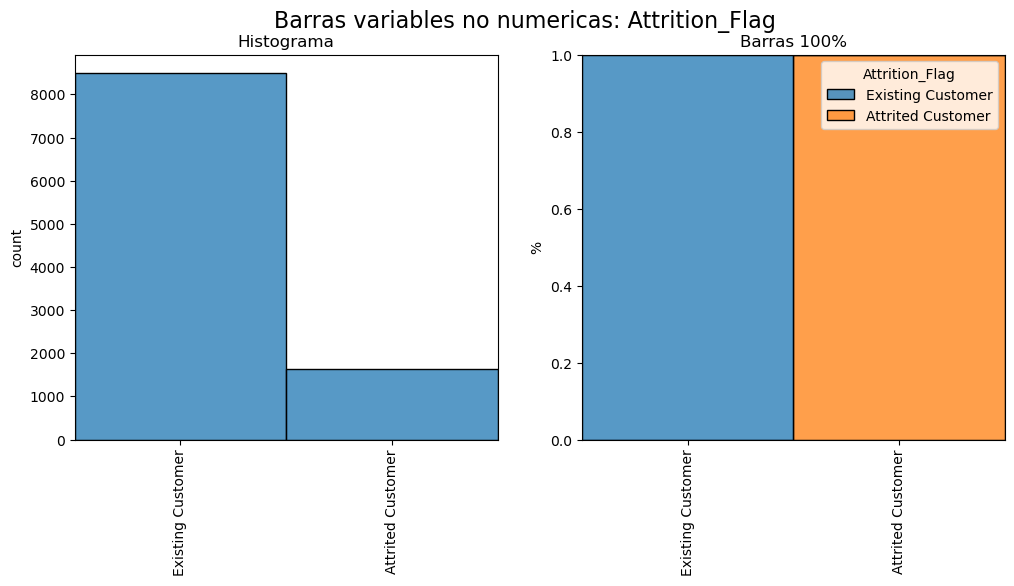

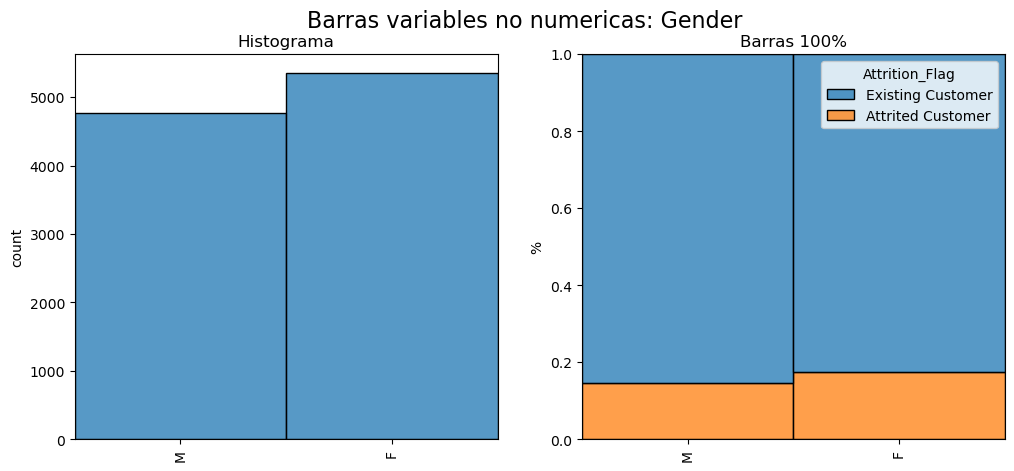

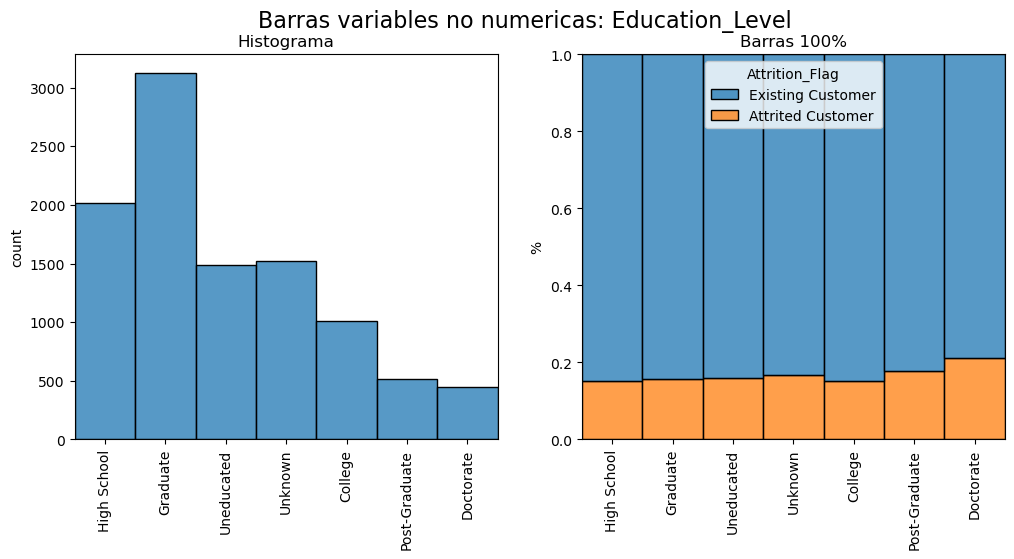

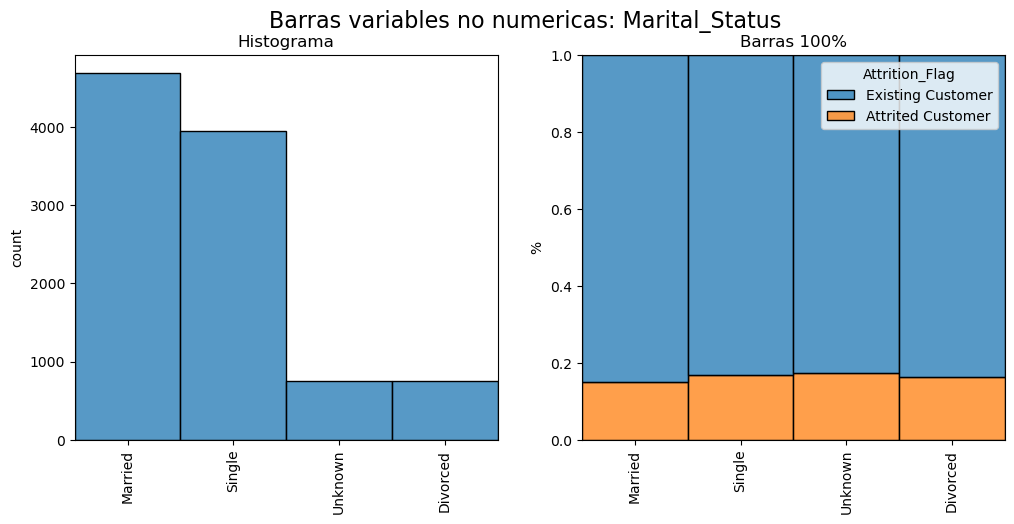

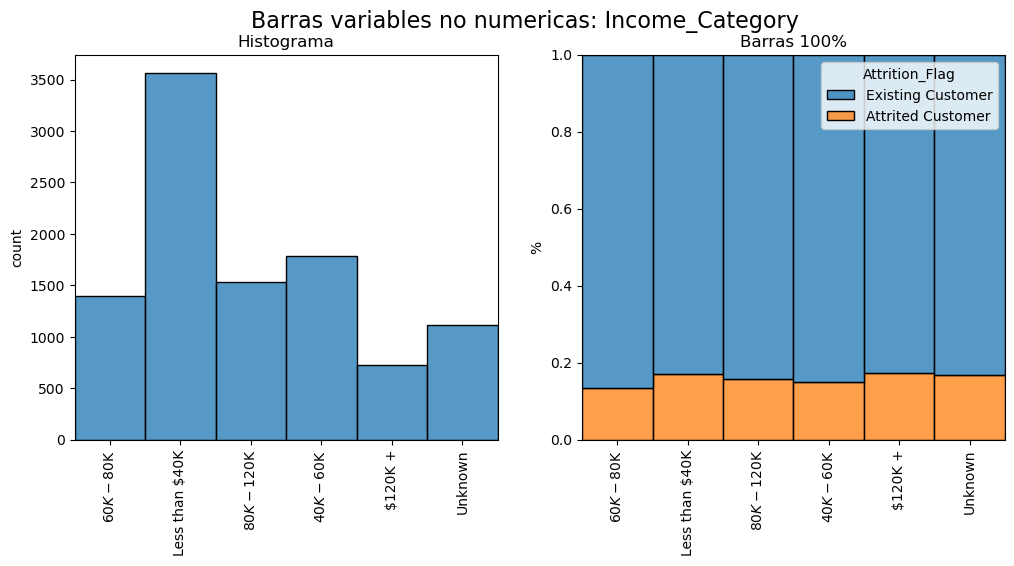

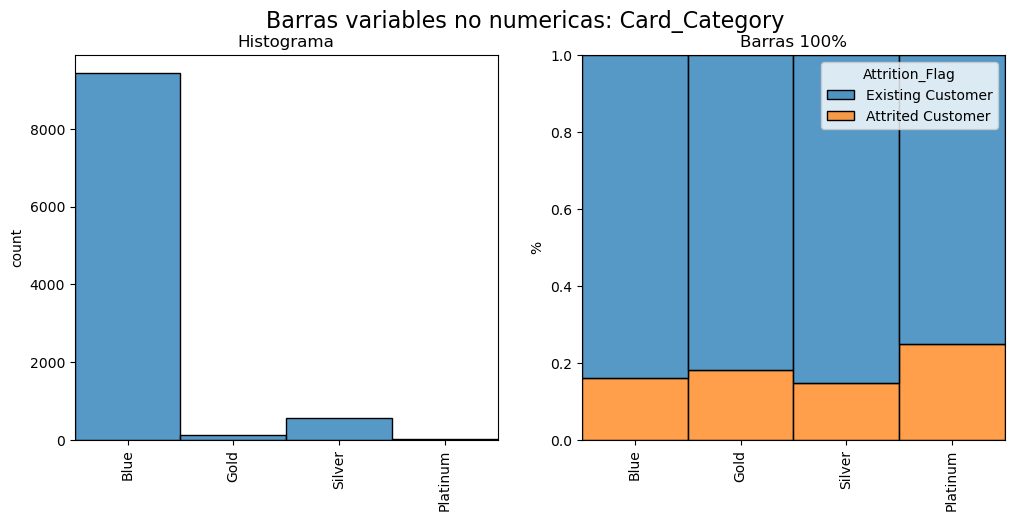

In [10]:
for i in range(len(var_no_num)):
    graf_cat(var_no_num[i])

### Graficos detallados de cada variable numerica segun target

## Análisis de Hipótesis y respuesta a preguntas 

### Hipótesis 1

H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

In [12]:
media_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).mean()
sum_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).sum()
print('media del monto total de transacciones por Attrition Flag')
print(media_tta)
print('_ '*30)
print(' ')
print('suma del monto total de transacciones por Attrition Flag')
print(sum_tta)

media del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    3095.025814
Existing Customer    4654.655882
Name: Total_Trans_Amt, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     5035607
Existing Customer    39564575
Name: Total_Trans_Amt, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H1 y se validaria la H0.

En función de esto, se procede a analizar mas a detalle. Para ello se realizan 2 graficos, un histograma y un boxplot con el objetivo de determinar que tipo de distribucion siguen los datos y para determinar la existencia de outliers. En caso de que se encuentren outliers la media no es una medida muy representativa, por lo que se analizara con la mediana.

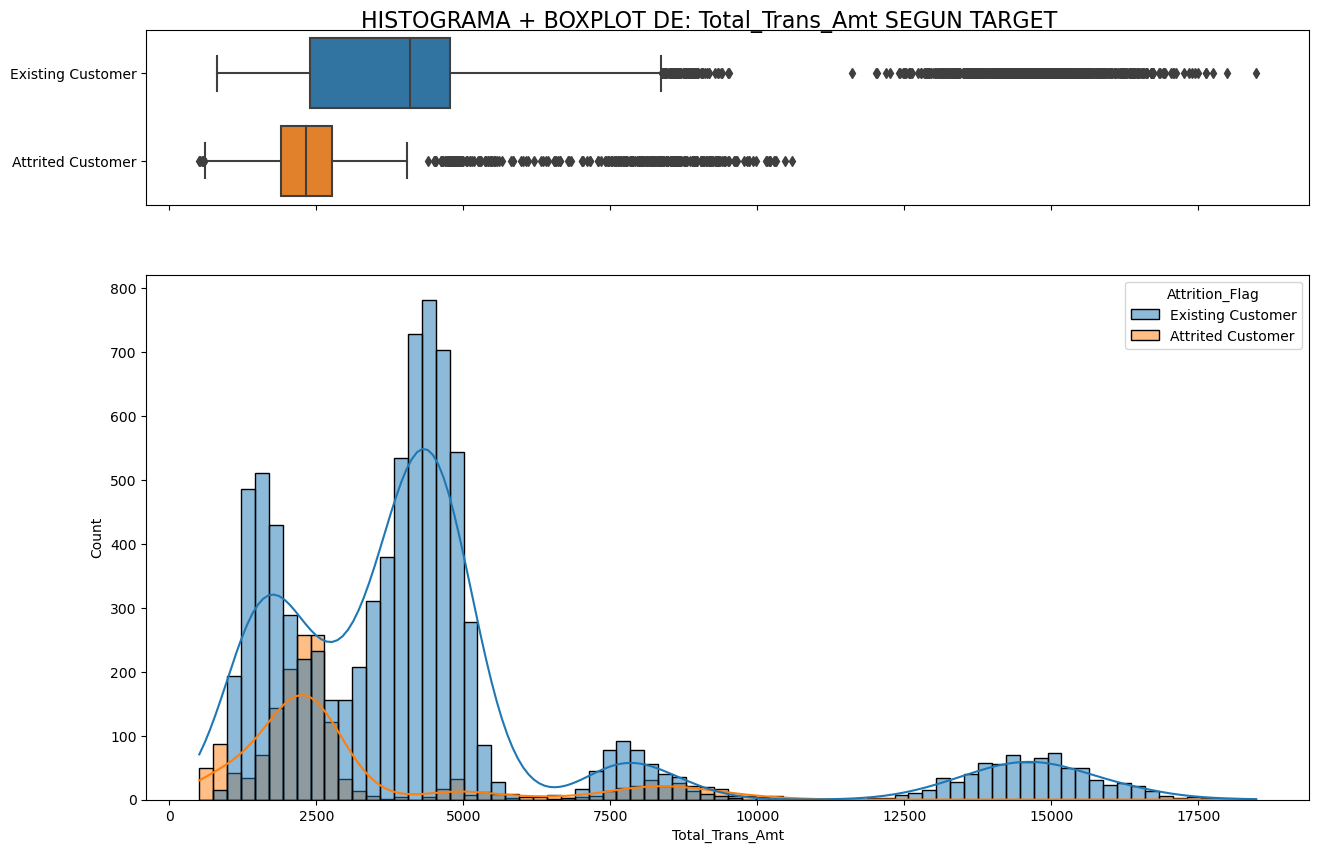

In [13]:
hist_box('Total_Trans_Amt','Attrition_Flag')


Se observa gran cantidad de outliers, por lo que se analizara la mediana.

In [14]:
mediana_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).median()
print('mediana del monto total de transacciones por Attrition Flag')
print(mediana_tta)

mediana del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    2329.0
Existing Customer    4100.0
Name: Total_Trans_Amt, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR 
Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [15]:
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  1903.5
Q3R =  2772.0
IQR Retirados =  868.5
Q1A =  2384.75
Q3A =  4781.25
IQR Activos =  2396.5


Podemos observar que los montos de las transferencias realizadas por clientes activos se concentran entre los 2384 y 4781 USD. Mientras que los montos de las transferencias realizadas por clientes retirados se encuentran entre los 1903 y 2772 USD

### Hipótesis 2

H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es igual para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es diferente para clientes activos y retirados

In [16]:
media_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).mean()
sum_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).sum()
print('media del conteo total de transacciones por Attrition Flag')
print(media_ttc)
print('_ '*30)
print(' ')
print('suma del conteo total de transacciones por Attrition Flag')
print(sum_ttc)

media del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    44.933620
Existing Customer    68.672588
Name: Total_Trans_Ct, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     73107
Existing Customer    583717
Name: Total_Trans_Ct, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H2 y se validaria la H0.

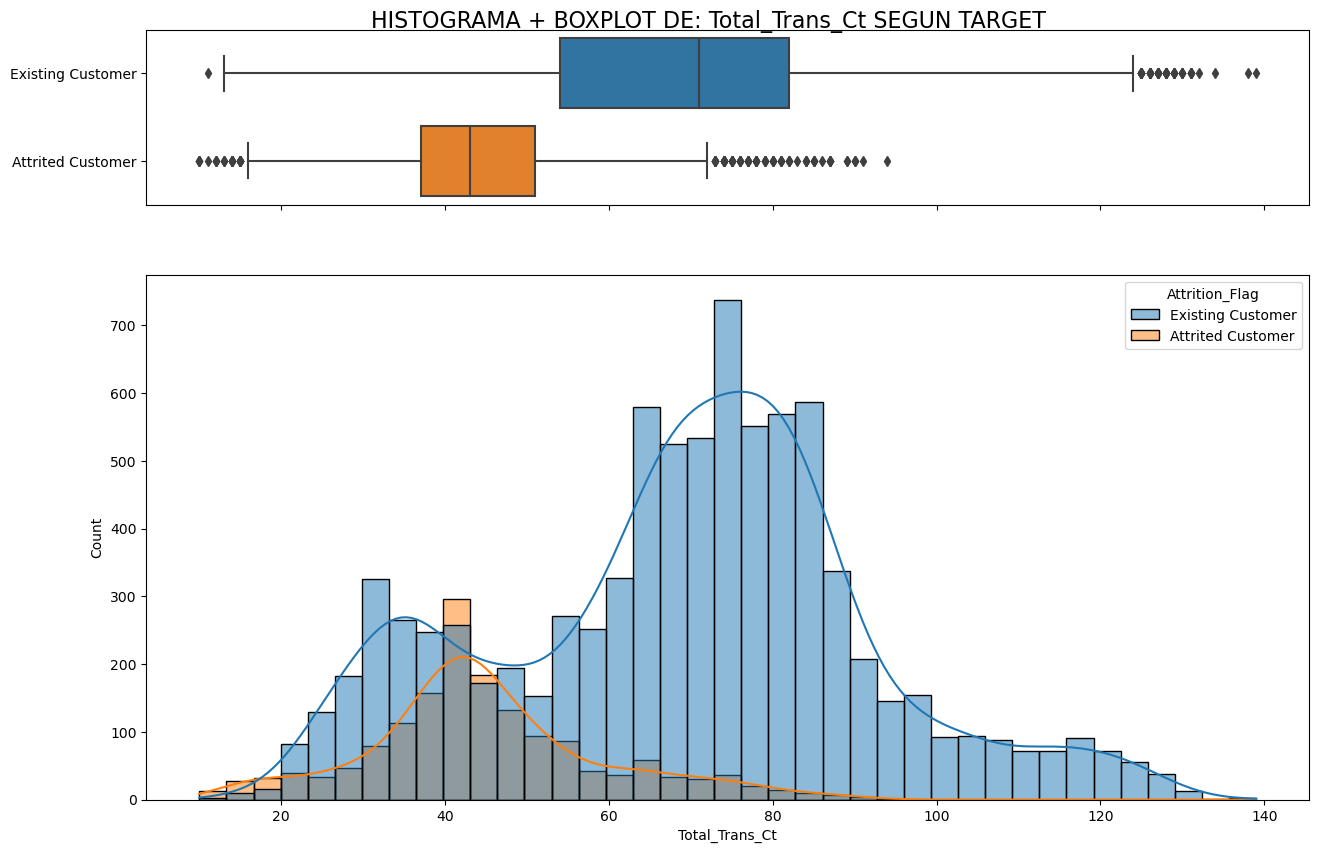

In [17]:
hist_box('Total_Trans_Ct','Attrition_Flag')

In [18]:
mediana_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).median()
print('Mediana del conteo total de transacciones por Attrition Flag')
print(mediana_ttc)

Mediana del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    43.0
Existing Customer    71.0
Name: Total_Trans_Ct, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [19]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  37.0
Q3R =  51.0
IQR Retirados =  14.0
Q1A =  54.0
Q3A =  82.0
IQR Activos =  28.0


Podemos observar que la cantiad de transferencias realizada por clientes activos se encunentra entre 54 y 82. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 37 y 51.

### Hipótesis 3


H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es igual para clientes activos y retirados

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es diferente para clientes activos y retirados

In [20]:
media_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).mean()
sum_tcc_Q4Q1 = bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).sum()
print('Media de cantidad de transferencias realizadas por Attrition Flag')
print(media_tcc_Q4Q1)
print('_ '*33)
print(' ')
print('Suma de cantidad de transferencias realizadas por Attrition Flag')
print(sum_tcc_Q4Q1)

Media de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.554386
Existing Customer    0.742434
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Suma de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer     901.986
Existing Customer    6310.690
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H3 y se validaria la H0.

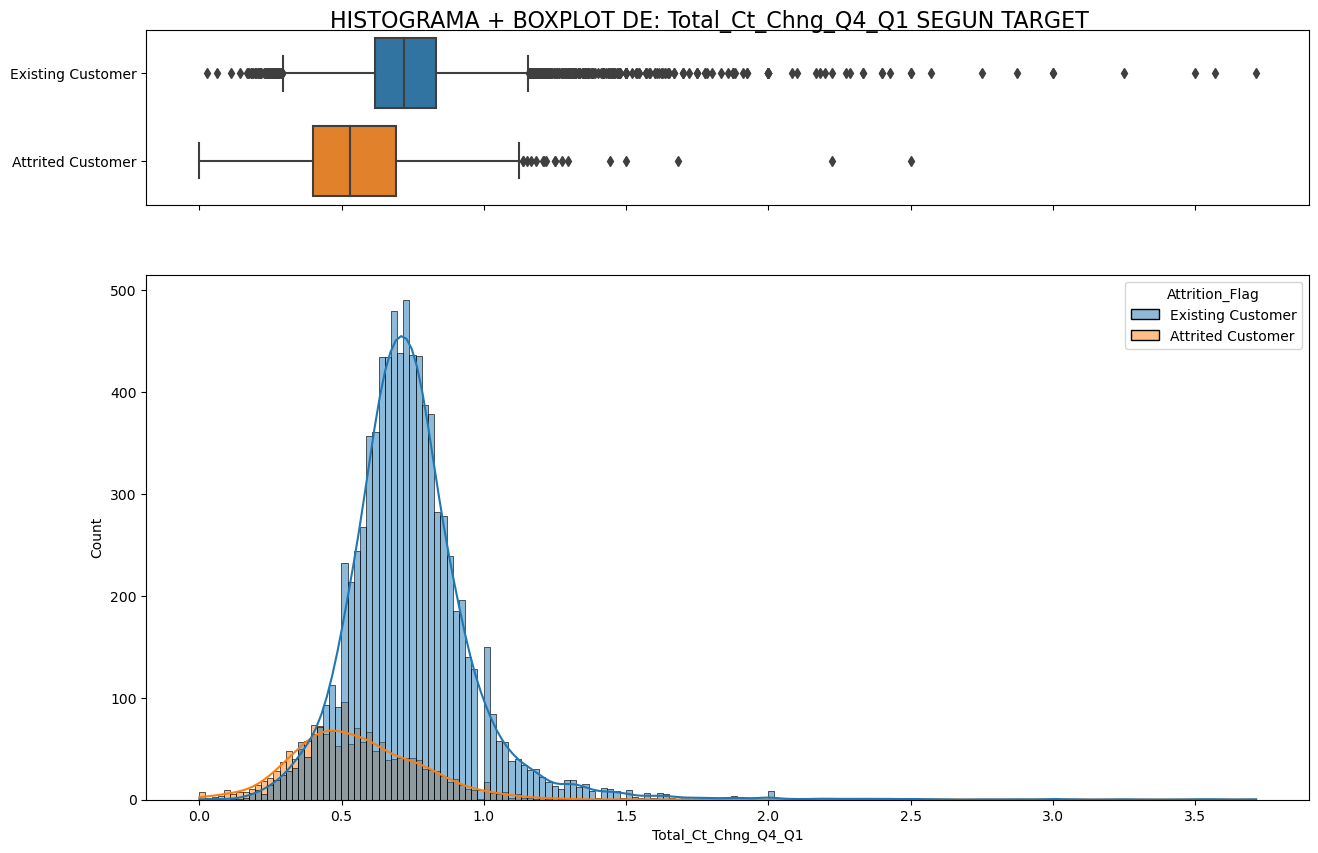

In [21]:
hist_box('Total_Ct_Chng_Q4_Q1','Attrition_Flag')

In [22]:
mediana_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).median()
print('Mediana de cantidad de transferencias realizadas por Attrition Flag')
print(mediana_tcc_Q4Q1)

Mediana de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.531
Existing Customer    0.721
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [23]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  0.4
Q3R =  0.692
IQR Retirados =  0.2919999999999999
Q1A =  0.617
Q3A =  0.833
IQR Activos =  0.21599999999999997


Podemos observar que la variación de la cantidad de transferencias realizadas por clientes activos se encuentra entre 0,61 y 0,833. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 0,4 y 0,692..

### Pregunta 1 ¿Cúal es el género que más abandona la tarjeta de crédito?

In [24]:
gender_count = bank_df['Gender'].groupby(bank_df['Attrition_Flag']).value_counts()
print('Gender_count \n',gender_count)

Gender_count 
 Attrition_Flag     Gender
Attrited Customer  F          930
                   M          697
Existing Customer  F         4428
                   M         4072
Name: Gender, dtype: int64


In [25]:
gender_df = bank_df['Attrition_Flag'].groupby(bank_df['Gender']).value_counts().unstack()
gender_df['%_out'] = (gender_df['Attrited Customer'] / (gender_df['Attrited Customer'] + gender_df['Existing Customer']))*100
gender_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Gender,,,
F,930,4428,17.357223
M,697,4072,14.615223


Dentro del genero femenino, abandonan aproximadamente un 17%

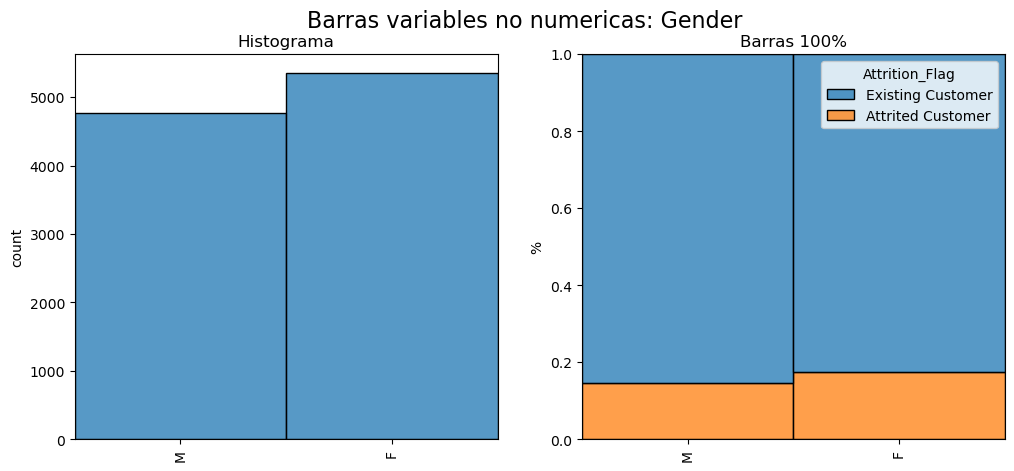

In [26]:
graf_cat('Gender')

### Pregunta 2: ¿Cúal es el estado civil de los clientes que abandonan el servicio?


In [27]:
marital_statuts_count = bank_df['Marital_Status'].groupby(bank_df['Attrition_Flag']).value_counts()
print('Marital_statuts_count \n',marital_statuts_count,)

Marital_statuts_count 
 Attrition_Flag     Marital_Status
Attrited Customer  Married            709
                   Single             668
                   Unknown            129
                   Divorced           121
Existing Customer  Married           3978
                   Single            3275
                   Divorced           627
                   Unknown            620
Name: Marital_Status, dtype: int64


In [28]:
marital_status_df = bank_df['Attrition_Flag'].groupby(bank_df['Marital_Status']).value_counts().unstack()
marital_status_df['%_out'] = (marital_status_df['Attrited Customer'] / (marital_status_df['Attrited Customer'] + marital_status_df['Existing Customer']))*100
marital_status_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Marital_Status,,,
Unknown,129,620,17.222964
Single,668,3275,16.941415
Divorced,121,627,16.176471
Married,709,3978,15.126947


Dentro del genero desconocido, un 17% abandona el servicio 

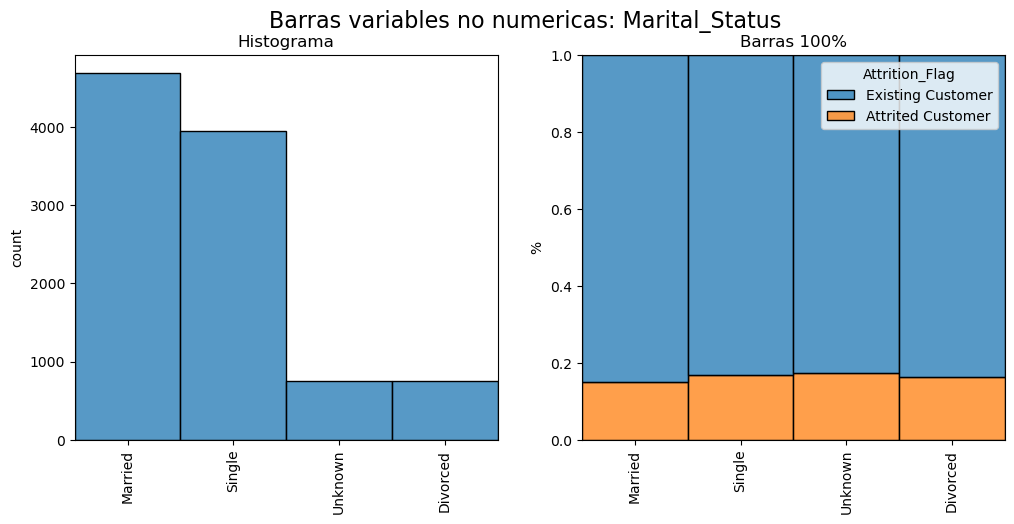

In [29]:
graf_cat('Marital_Status')

### Pregunta 3 ¿Que edades promedio tienen las personas que abandonan las tarjetas de crédito?

In [30]:
mean_years = bank_df['Customer_Age'].groupby(bank_df['Attrition_Flag']).mean()

print('mean_time Attrtied Customer\n',mean_years['Attrited Customer'])
print('mean_time Existing Customer\n',mean_years['Existing Customer'])

mean_time Attrtied Customer
 46.659496004917024
mean_time Existing Customer
 46.26211764705882


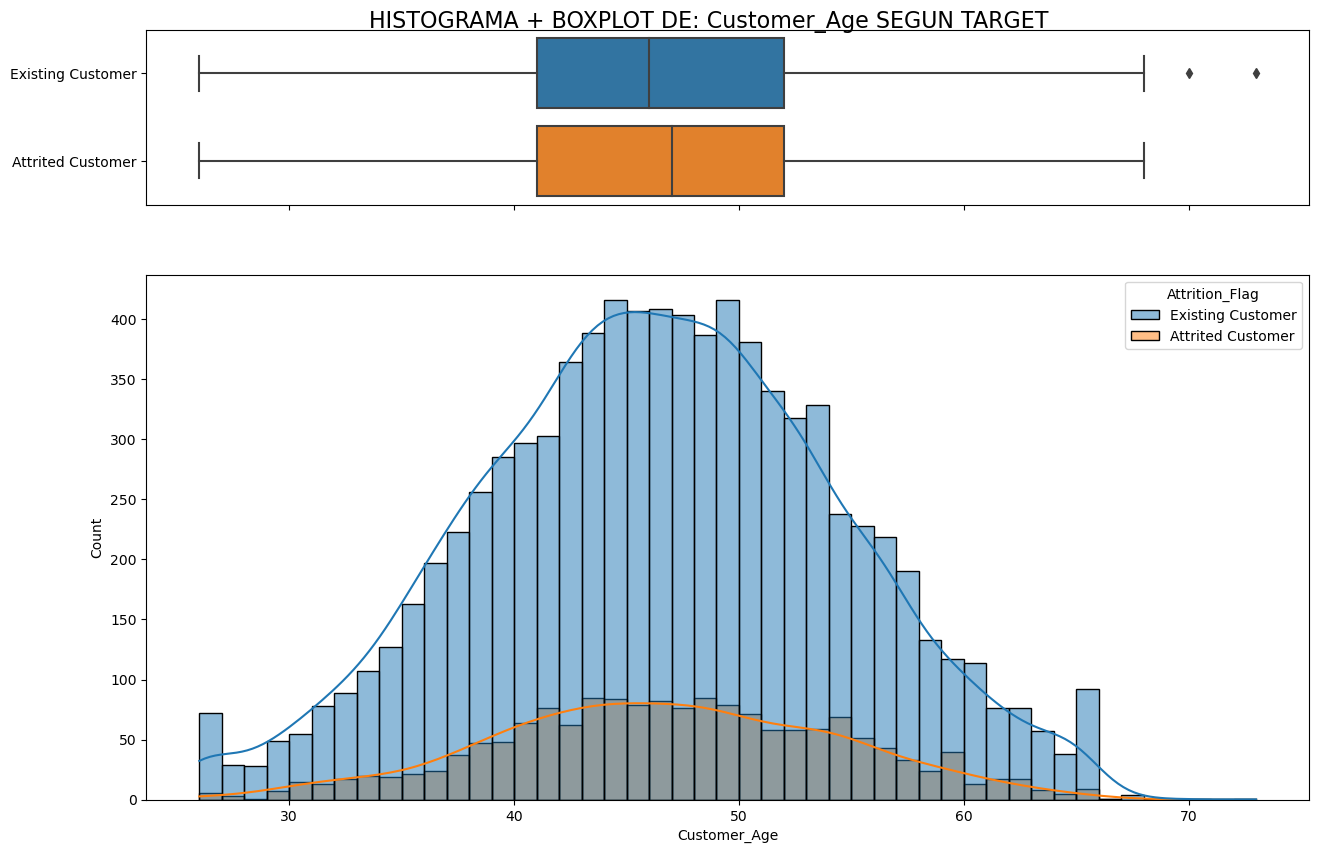

In [31]:
hist_box('Customer_Age','Attrition_Flag')

### Pregunta 4 ¿Cuanto tiempo sin utilizacion llevan las tarjetas de los clientes que abandonan?

In [32]:
mean_time = bank_df['Months_Inactive_12_mon'].groupby(bank_df['Attrition_Flag']).mean()
print('mean_time Attried Customer\n',mean_time['Attrited Customer'])
print('mean_time Existing Customer\n',mean_time['Existing Customer'])

mean_time Attried Customer
 2.693300553165335
mean_time Existing Customer
 2.273764705882353


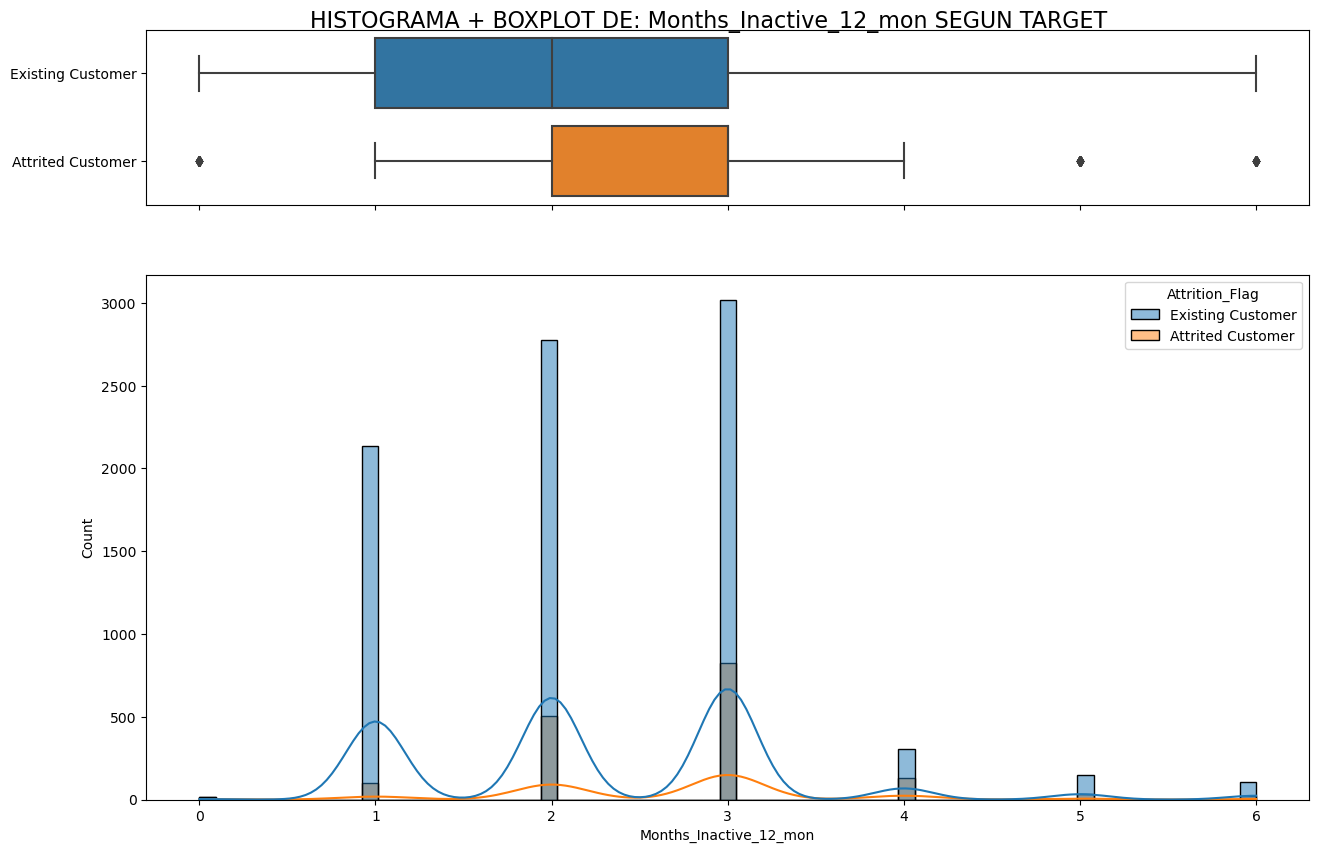

In [33]:
hist_box('Months_Inactive_12_mon','Attrition_Flag')

### Pregunta 5 ¿Que tipo de tarjeta usan los clientes que abandonan los servicios?

In [34]:
card_type = bank_df['Card_Category'].groupby(bank_df['Attrition_Flag']).value_counts()
print('card_type \n',card_type)

card_type 
 Attrition_Flag     Card_Category
Attrited Customer  Blue             1519
                   Silver             82
                   Gold               21
                   Platinum            5
Existing Customer  Blue             7917
                   Silver            473
                   Gold               95
                   Platinum           15
Name: Card_Category, dtype: int64


In [35]:
card_type_df = bank_df['Attrition_Flag'].groupby(bank_df['Card_Category']).value_counts().unstack()
card_type_df['%_out'] = (card_type_df['Attrited Customer'] / (card_type_df['Attrited Customer'] + card_type_df['Existing Customer']))*100
card_type_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Card_Category,,,
Platinum,5,15,25.000000
Gold,21,95,18.103448
Blue,1519,7917,16.097923
Silver,82,473,14.774775


Dentro de la categoria platinum, un 25% abandona el servicio. 

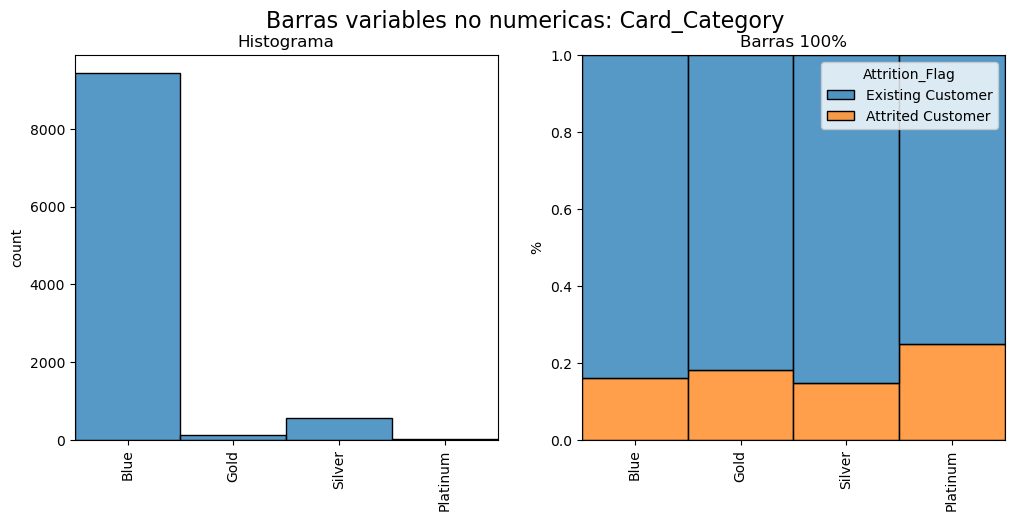

In [36]:
graf_cat('Card_Category')

### Pregunta 6 ¿Que nivel de educacion tienen los clientes que abanonan los servicios?

In [37]:
education_count = bank_df['Education_Level'].groupby(bank_df['Attrition_Flag']).value_counts()
print('education_count \n',education_count)

education_count 
 Attrition_Flag     Education_Level
Attrited Customer  Graduate            487
                   High School         306
                   Unknown             256
                   Uneducated          237
                   College             154
                   Doctorate            95
                   Post-Graduate        92
Existing Customer  Graduate           2641
                   High School        1707
                   Unknown            1263
                   Uneducated         1250
                   College             859
                   Post-Graduate       424
                   Doctorate           356
Name: Education_Level, dtype: int64


In [38]:
education_df = bank_df['Attrition_Flag'].groupby(bank_df['Education_Level']).value_counts().unstack()
education_df['%_out'] = (education_df['Attrited Customer'] / (education_df['Attrited Customer'] + education_df['Existing Customer']))*100
education_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Education_Level,,,
Doctorate,95,356,21.064302
Post-Graduate,92,424,17.829457
Unknown,256,1263,16.853193
Uneducated,237,1250,15.938130
Graduate,487,2641,15.569054
College,154,859,15.202369
High School,306,1707,15.201192


Dentro de el nivel de educacion Doctorado, el 21% abandona el servicio 

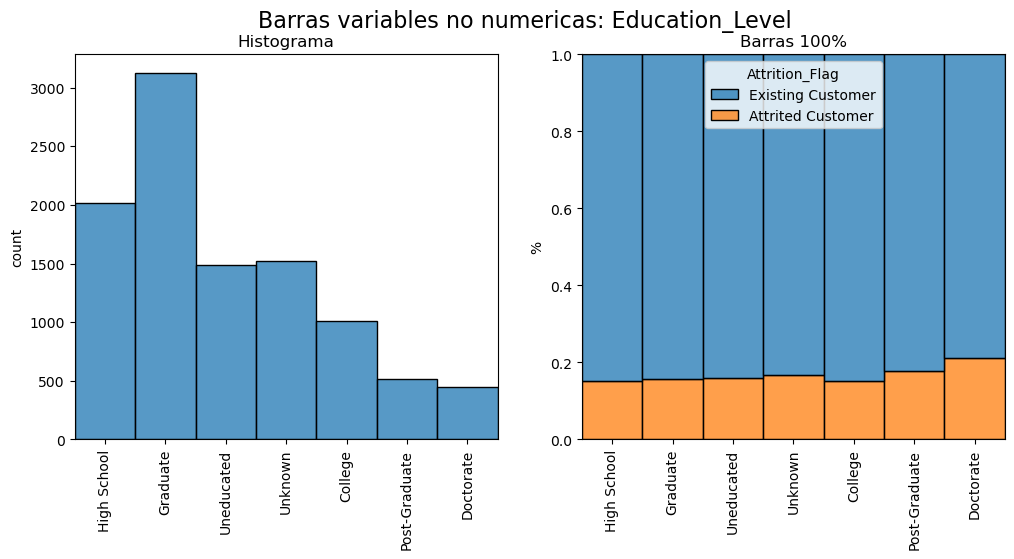

In [39]:
graf_cat('Education_Level')

### Pregunta 7 ¿Que nivel de ingresos tienen los clientes que abandonan los servicios?

In [40]:
income_level = bank_df['Income_Category'].groupby(bank_df['Attrition_Flag']).value_counts()
print('income_level \n',income_level)

income_level 
 Attrition_Flag     Income_Category
Attrited Customer  Less than $40K      612
                   $40K - $60K         271
                   $80K - $120K        242
                   $60K - $80K         189
                   Unknown             187
                   $120K +             126
Existing Customer  Less than $40K     2949
                   $40K - $60K        1519
                   $80K - $120K       1293
                   $60K - $80K        1213
                   Unknown             925
                   $120K +             601
Name: Income_Category, dtype: int64


In [41]:
income_lvl_df = bank_df['Attrition_Flag'].groupby(bank_df['Income_Category']).value_counts().unstack()
income_lvl_df['%_out'] = (income_lvl_df['Attrited Customer'] / (income_lvl_df['Attrited Customer'] + income_lvl_df['Existing Customer']))*100
income_lvl_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Income_Category,,,
$120K +,126,601,17.331499
Less than $40K,612,2949,17.186184
Unknown,187,925,16.816547
$80K - $120K,242,1293,15.765472
$40K - $60K,271,1519,15.139665
$60K - $80K,189,1213,13.480742


Dentro del nivel de ingresos de +120K, el 17,3% abandona el servicio.

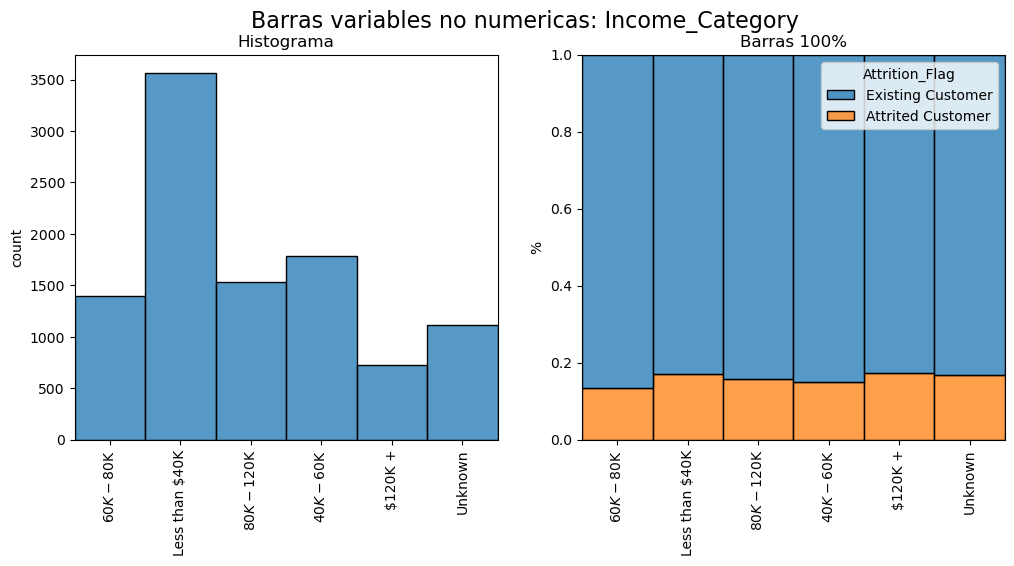

In [42]:
graf_cat('Income_Category')